# Languages Popularity by Year
# Question N°1
This notebook purpose is to answer the First Question: </br>
<b><i>"What languages were the most popular in each year?"</i></b>


In order to do so, I would need previously loaded data about surveys.

In [2]:
import os
import pandas as pd
import joblib
df_surveys_11_to_24 = None
%store -r df_surveys_11_to_24
# sys.path.append(os.path.join("..", "preparation"))

In [3]:
import sys
import os

# Get the parent directory
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

# Append the parent directory to the system path
sys.path.append(parent_dir)

#### Features understanding
I will use the following features to produce an answer
to the question number 1 :

2011. "Which languages are you proficient in?"(column 30) to "Unnamed: 40" (column 40)
2012. "Which languages are you proficient in?" (column 22) to "Unnamed: 34" (column 34)
2013. "Which of the following languages or technologies have you used significantly in the past year?" (column 56)
to "Unnamed: 68" (column 68)
2014. "Which of the following languages or technologies have you used significantly in the past year?" (column 42)
to "Unnamed: 52" (column 52)
2015. "Current Lang & Tech <LanguageName>" columns, (columns from 8 to 49), <LanguageName> would, most of the time,
indicate a name of a programming language, sometimes including also more general technology names (e.g. Android).
2016. "tech_do", "tech_want" (columns from 66 to 99)
2017. "HaveWorkedLanguage", "WantWorkLanguage"
2018. "LanguageWorkedWith", "LanguageDesireNextYear"
2019. "LanguageWorkedWith", "LanguageDesireNextYear"
2020. "LanguageWorkedWith", "LanguageDesireNextYear"
2021. "LanguageWorkedWith", "LanguageWantToWorkWith"
2022. "LanguageWorkedWith", "LanguageWantToWorkWith"

Before this kind of analysis, it would be better to prepare the data.
In order to do so, I will define Columns' Range of Interest in the first 5 dataframe, 2011 to 2015,
where language proficiencies' features are already split into columns.

In [4]:
# Language Proficiencies Columns' Range of Interest
lang_prof_CROI_2011 = range(30, 41)
lang_prof_CROI_2012 = range(22, 35)
lang_prof_CROI_2013 = range(56, 69)
lang_prof_CROI_2014 = range(42, 53)
lang_prof_CROI_2015 = range(8, 50)
lang_prof_CROI_2016 = range(66, 99)
#lang_prof_CROI_2017 = range(66, 99)

## 3. Data Preparation

First, I already observed that:
1. 2011 to 2014 data has a first non valid data row, containing "Response" as value,
2. 2015 dataframe heading should be properly fixed:

In [6]:
from preparation.data_transform import drop_first_row
# dropping first row in dataframes containing data from 2011 to 2014
drop_first_row(df_surveys_11_to_24, 2011, 2014)


As said, 2015 data hasn't been correctly loaded, since the header doesn't contain valid feature names.
Valid header data is actually in the first dataframe row.
So, I will replace it properly:

In [7]:
new_2015_header = df_surveys_11_to_24[2015].iloc[0]
df_surveys_11_to_24[2015] = df_surveys_11_to_24[2015][1:]
df_surveys_11_to_24[2015].columns = new_2015_header

now I will cross-check the results:

In [8]:
df_surveys_11_to_24[2015].head(1)


,Country,Age,Gender,Tabs or Spaces,Years IT / Programming Experience,Occupation,Desktop Operating System,Desktop Operating System: write-in,Current Lang & Tech: Android,Current Lang & Tech: Arduino,...,Why use Stack Overflow: I don't use Stack Overflow,How often are Stack Overflow's answers helpful,Why answer: Help a programmer in need,Why answer: Help future programmers,Why answer: Demonstrate expertise,Why answer: Self promotion,Why answer: Sense of responsibility to developers,Why answer: No idea,Why answer: I don't answer and I don't want to,Why answer: I don't answer but I want to
1,Croatia,25-29,Male,Tabs,2 - 5 years,Back-end web developer,Ubuntu,NaN,NaN,NaN,...,NaN,Usually,NaN,NaN,It feels good to demonstrate my expertise.,Demonstrating my expertise will benefit me,I feel a sense of responsibility to the develo...,NaN,NaN,NaN


Now I'll prepare data to be categorized, so that it could be better suited for analysis about first question <br/>
(the categorization could be used for other questions too):


In [9]:
new_column_name_prefix = "Proficient in"

Importing proper preparatory functions:

In [10]:
from preparation.data_transform import transform_unnamed_cols_base, feature_split

Preparing 2011 data:

In [11]:
from pathlib import Path
import os
path = os.path.dirname(Path(os.getcwd()))

In [12]:
file_name = "2011_results_prepared.csv"
complete_file_name = os.path.join(path, "data", file_name)

In [13]:
if os.path.isfile(complete_file_name):
    df_surveys_11 = pd.read_csv(complete_file_name)
else:
    starting_column_name = "Which languages are you proficient in?"
    df_surveys_11 = transform_unnamed_cols_base(df_surveys_11_to_24[2011], starting_column_name,
                                                columns_look_ahead=len(lang_prof_CROI_2011),
                                                new_column_name_prefix=new_column_name_prefix)
    df_surveys_11.to_csv(complete_file_name)
df_surveys_11.head(3)

,Unnamed: 0,What Country or Region do you live in?,Which US State or Territory do you live in?,How old are you?,How many years of IT/Programming experience do you have?,How would you best describe the industry you work in?,Which best describes the size of your company?,Which of the following best describes your occupation?,How likely is it that a recommendation you make will be acted upon?,What is your involvement in purchasing? You can choose more than 1.,...,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,"In the last 12 months, how much money have you spent on personal technology-related purchases?",Which of our sites do you frequent most?
0,1,Africa,NaN,< 20,<2,Consulting,Start Up (1-25),Web Application Developer,Not in a million years,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<$100,NaN
1,2,Other Europe,NaN,25-29,41310,Software Products,Mature Small Business (25-100),Server Programmer,It's been known to happen,NaN,...,NaN,NaN,Other netbook,NaN,NaN,NaN,NaN,NaN,$251-$500,Stack Overflow
2,3,India,NaN,25-29,41435,Software Products,Mid Sized (100-999),Server Programmer,Unless it's stoopid it gets done,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


the same procedure can be applied to 2012 survey data:

In [14]:
file_name = "2012_results_prepared.csv"
complete_file_name = os.path.join(path, "data", file_name)

In [15]:
if os.path.isfile(complete_file_name):
    df_surveys_12 = pd.read_csv(complete_file_name)
else:
    df_surveys_12 = transform_unnamed_cols_base(df_surveys_11_to_24[2012], starting_column_name,
                                            columns_look_ahead=len(lang_prof_CROI_2012),
                                            new_column_name_prefix=new_column_name_prefix)
    df_surveys_12.to_csv(complete_file_name)
df_surveys_12.head(3)

,Unnamed: 0,What Country or Region do you live in?,Which US State or Territory do you live in?,How old are you?,How many years of IT/Programming experience do you have?,How would you best describe the industry you currently work in?,Which best describes the size of your company?,Which of the following best describes your occupation?,What is your involvement in purchasing products or services for the company you work for? (You can choose more than one),Unnamed: 8,...,Please rate the advertising you've seen on Stack Overflow,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,What advertisers do you remember seeing on Stack Overflow?,What is your current Stack Overflow reputation?,Which of our sites do you frequent most?,Unnamed: 74
0,1,India,NaN,20-24,<2,Consulting,"Fortune 1000 (1,000+)",Server Programmer,Influencer,Recommender,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Germany,NaN,25-29,<2,Other,Mature Small Business (25-100),Embedded Application Developer,NaN,Recommender,...,Neutral,Agree,Agree,Strongly Disagree,Strongly Disagree,Disagree,NaN,Don't have an account,Stack Overflow,NaN
2,3,United Kingdom,NaN,20-24,41070,Finance / Banking,Mature Small Business (25-100),Web Application Developer,Influencer,Recommender,...,Neutral,Neutral,Neutral,Neutral,Neutral,Strongly Agree,NaN,1,Stack Overflow,NaN


...to 2013 survey data:


In [16]:
file_name = "2013_results_prepared.csv"
complete_file_name = os.path.join(path, "data", file_name)

In [17]:
if os.path.isfile(complete_file_name):
    df_surveys_13 = pd.read_csv(complete_file_name)
else:
    starting_column_name = "Which of the following languages or technologies have you used significantly in the past year?"
    df_surveys_13 = transform_unnamed_cols_base(df_surveys_11_to_24[2013], starting_column_name,
                                            columns_look_ahead=len(lang_prof_CROI_2013),
                                            new_column_name_prefix=new_column_name_prefix)
    df_surveys_13.to_csv(complete_file_name)
df_surveys_13.head(3)


,Unnamed: 0,What Country or Region do you live in?,Which US State or Territory do you live in?,How old are you?,How many years of IT/Programming experience do you have?,How would you best describe the industry you currently work in?,How many people work for your company?,Which of the following best describes your occupation?,"Including yourself, how many developers are employed at your company?",How large is the team that you work on?,...,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,What advertisers do you remember seeing on Stack Overflow?,What is your current Stack Overflow reputation?,How do you use Stack Overflow?,Unnamed: 125,Unnamed: 126,Unnamed: 127
0,1,United Kingdom,NaN,35-39,6/10/2013,Finance / Banking,101-999,Enterprise Level Services,100,4/8/2013,...,Neutral,Neutral,Neutral,Neutral,NaN,Don't have an account,Read other people's questions to solve my prob...,NaN,NaN,NaN
1,2,United States of America,Oregon,25-29,6/10/2013,Retail,101-999,Back-End Web Developer,6/15/2013,4/8/2013,...,Neutral,Agree,Disagree,Neutral,"StackOverflow themselves, Careers 2.0 (SO also...",1,Read other people's questions to solve my prob...,Ask questions to solve problems,Answer questions I know the answer to,NaN
2,3,United States of America,Wisconsin,51-60,11,Software Products,26-100,Enterprise Level Services,6/15/2013,Just me!,...,Neutral,Strongly Disagree,Strongly Disagree,Strongly Disagree,don't recall seeing ads on Stack Overflow,Don't have an account,Read other people's questions to solve my prob...,NaN,NaN,NaN


...to 2014 survey data:


In [18]:
file_name = "2014_results_prepared.csv"
complete_file_name = os.path.join(path, "data", file_name)

In [19]:
if os.path.isfile(complete_file_name):
    df_surveys_14 = pd.read_csv(complete_file_name)
else:
    starting_column_name = "Which of the following languages or technologies have you used significantly in the past year?"
    df_surveys_14 = transform_unnamed_cols_base(df_surveys_11_to_24[2014], starting_column_name,
                                            columns_look_ahead=len(lang_prof_CROI_2014),
                                            new_column_name_prefix=new_column_name_prefix)
    df_surveys_14.to_csv(complete_file_name)
df_surveys_14.head(3)

,Unnamed: 0,What Country do you live in?,Unnamed: 1,Which US State or Territory do you live in?,How old are you?,What is your gender?,How many years of IT/Programming experience do you have?,Which of the following best describes your occupation?,"Including bonus, what is your annual compensation in USD?",How would you best describe the industry you currently work in?,...,Did you participate in the Apptivate contest?,What advertisers do you remember seeing on Stack Overflow?,What is your current Stack Overflow reputation?,How do you use Stack Overflow?,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,How often do you find solutions to your programming problems on Stack Overflow without asking a new question?
0,1,India,NaN,NaN,30-34,Female,6/10/2014,Back-End Web Developer,"$20,000 - $40,000",Finance / Banking,...,No,NaN,500,Read other people's questions to solve my prob...,Ask questions to solve problems,NaN,NaN,NaN,NaN,Almost Always
1,2,Thailand,NaN,NaN,20-24,Male,<2,Back-End Web Developer,Student / Unemployed,Healthcare,...,NaN,NaN,Don't have an account,Read other people's questions to solve my prob...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Iran,NaN,NaN,25-29,Male,6/10/2014,Desktop Software Developer,"<$20,000",Not Currently Employed,...,No,Tehcodez,1,Read other people's questions to solve my prob...,NaN,NaN,NaN,NaN,NaN,Almost Always


Now, knowing from exploration phase that 2015 dataset have a different features' layout,
I'll use a specific function to prepare the data:

In [20]:
file_name = "2015_results_prepared.csv"
complete_file_name = os.path.join(path, "data", file_name)

In [21]:
from preparation.data_transform import df_2015_survey_preprocessing
if os.path.isfile(complete_file_name):
    df_surveys_15 = pd.read_csv(complete_file_name)
else:
    df_surveys_15 = df_2015_survey_preprocessing(df_surveys_11_to_24[2015], lang_prof_CROI_2015)
    df_surveys_15.to_csv(complete_file_name)
df_surveys_15.head(3)

C:\Users\alfon\AppData\Local\Temp\ipykernel_5620\3741646804.py:3: DtypeWarning: Columns (6,109,122,197,198,199) have mixed types. Specify dtype option on import or set low_memory=False.
  df_surveys_15 = pd.read_csv(complete_file_name)


,Unnamed: 0,Country,Age,Gender,Tabs or Spaces,Years IT / Programming Experience,Occupation,Desktop Operating System,Desktop Operating System: write-in,Current Lang & Tech: Android,...,Why use Stack Overflow: I don't use Stack Overflow,How often are Stack Overflow's answers helpful,Why answer: Help a programmer in need,Why answer: Help future programmers,Why answer: Demonstrate expertise,Why answer: Self promotion,Why answer: Sense of responsibility to developers,Why answer: No idea,Why answer: I don't answer and I don't want to,Why answer: I don't answer but I want to
0,1,Croatia,25-29,Male,Tabs,2 - 5 years,Back-end web developer,Ubuntu,NaN,0,...,NaN,Usually,NaN,NaN,It feels good to demonstrate my expertise.,Demonstrating my expertise will benefit me,I feel a sense of responsibility to the develo...,NaN,NaN,NaN
1,2,France,20-24,Male,Spaces,1 - 2 years,Back-end web developer,Windows 7,NaN,0,...,NaN,Usually,NaN,My answer will help lots of people who have th...,It feels good to demonstrate my expertise.,NaN,NaN,NaN,NaN,NaN
2,3,India,20-24,Male,Tabs,1 - 2 years,Back-end web developer,Windows 7,NaN,0,...,NaN,Rarely,NaN,NaN,NaN,Demonstrating my expertise will benefit me,NaN,NaN,NaN,NaN


Data from 2016 survey (and successive) on have a different layout, hence it should be processed differently:
from the fact that in the input dataframes all the feature categories sits in a single column separated by semicolons,
this feature column must be split, in order to obtain a similar layout as in previously described dataframes:

In [22]:
file_name = "2016_results_prepared.csv"
complete_file_name = os.path.join(path, "data", file_name)

In [23]:
if os.path.isfile(complete_file_name):
    df_surveys_16 = pd.read_csv(complete_file_name)
else:
    df_surveys_16 = feature_split(df=df_surveys_11_to_24[2016], column_to_split="tech_do", inplace=False)
    df_surveys_16.to_csv(complete_file_name)
df_surveys_16.head(3)

,Unnamed: 0.1,Unnamed: 0,collector,country,un_subregion,so_region,age_range,age_midpoint,gender,self_identification,...,tech_do: Salesforce,tech_do: Scala,tech_do: SharePoint,tech_do: Spark,tech_do: SQL,tech_do: SQL Server,tech_do: Swift,tech_do: Visual Basic,tech_do: Windows Phone,tech_do: WordPress
0,0,1888,Facebook,Afghanistan,Southern Asia,Central Asia,20-24,22.0,Male,Programmer,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,4637,Facebook,Afghanistan,Southern Asia,Central Asia,30-34,32.0,Male,Developer; Engineer; Programmer,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,11164,Facebook,Afghanistan,Southern Asia,Central Asia,0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


This process will also be applicable to 2017 data:

In [24]:
file_name = "2017_results_prepared.csv"
complete_file_name = os.path.join(path, "data", file_name)

In [25]:
if os.path.isfile(complete_file_name):
    df_surveys_17 = pd.read_csv(complete_file_name)
else:
    df_surveys_17 = feature_split(df=df_surveys_11_to_24[2017], column_to_split="HaveWorkedLanguage", inplace=False)
    df_surveys_17.to_csv(complete_file_name)
df_surveys_17.head(3)

,Unnamed: 0,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,...,HaveWorkedLanguage: Lua,HaveWorkedLanguage: VBA,HaveWorkedLanguage: Groovy,HaveWorkedLanguage: Go,HaveWorkedLanguage: Smalltalk,HaveWorkedLanguage: Visual Basic 6,HaveWorkedLanguage: Common Lisp,HaveWorkedLanguage: Dart,HaveWorkedLanguage: Julia,HaveWorkedLanguage: Hack
0,0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


... 2018 data:

In [26]:
file_name = "2018_results_prepared.csv"
complete_file_name = os.path.join(path, "data", file_name)

In [27]:
if os.path.isfile(complete_file_name):
    df_surveys_18 = pd.read_csv(complete_file_name)
else:
    df_surveys_18 = feature_split(df=df_surveys_11_to_22[2018], column_to_split="LanguageWorkedWith", inplace=False)
    df_surveys_18.to_csv(complete_file_name)
df_surveys_18.head(3)

C:\Users\alfon\AppData\Local\Temp\ipykernel_5620\2344826150.py:2: DtypeWarning: Columns (9,13,14,15,16,17,51,52,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  df_surveys_18 = pd.read_csv(complete_file_name)


,Unnamed: 0,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,...,LanguageWorkedWith: Rust,LanguageWorkedWith: Julia,LanguageWorkedWith: VBA,LanguageWorkedWith: Perl,LanguageWorkedWith: Cobol,LanguageWorkedWith: Visual Basic 6,LanguageWorkedWith: Delphi/Object Pascal,LanguageWorkedWith: Hack,LanguageWorkedWith: Clojure,LanguageWorkedWith: Ocaml
0,0,1,Yes,No,Kenya,No,Employed part-time,"Bachelorâs degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelorâs degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


... 2019 data:

In [28]:
file_name = "2019_results_prepared.csv"
complete_file_name = os.path.join(path, "data", file_name)

In [29]:
if os.path.isfile(complete_file_name):
    df_surveys_19 = pd.read_csv(complete_file_name)
else:
    df_surveys_19 = feature_split(df=df_surveys_11_to_24[2019], column_to_split="LanguageWorkedWith", inplace=False)
    df_surveys_19.to_csv(complete_file_name)
df_surveys_19.head(3)

,Unnamed: 0,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,LanguageWorkedWith: Assembly,LanguageWorkedWith: Kotlin,LanguageWorkedWith: Swift,LanguageWorkedWith: Objective-C,LanguageWorkedWith: Elixir,LanguageWorkedWith: Erlang,LanguageWorkedWith: Clojure,LanguageWorkedWith: F#,LanguageWorkedWith: Scala,LanguageWorkedWith: Dart
0,0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelorâs degree (BA, BS, B.Eng., etc.)",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


... 2020 data:

In [30]:
file_name = "2020_results_prepared.csv"
complete_file_name = os.path.join(path, "data", file_name)

In [31]:
if os.path.isfile(complete_file_name):
    df_surveys_20 = pd.read_csv(complete_file_name)
else:
    df_surveys_20 = feature_split(df=df_surveys_11_to_24[2020], column_to_split="LanguageWorkedWith", inplace=False)
    df_surveys_20.to_csv(complete_file_name)
df_surveys_20.head(3)

,Unnamed: 0,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,...,LanguageWorkedWith: VBA,LanguageWorkedWith: Perl,LanguageWorkedWith: Scala,LanguageWorkedWith: C++,LanguageWorkedWith: Go,LanguageWorkedWith: Haskell,LanguageWorkedWith: Rust,LanguageWorkedWith: Dart,LanguageWorkedWith: Julia,LanguageWorkedWith: Assembly
0,0,1,I am a developer by profession,Yes,0.0,13,Monthly,0.0,0.0,Germany,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2,I am a developer by profession,No,0.0,19,0,0.0,0.0,United Kingdom,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,3,I code primarily as a hobby,Yes,0.0,15,0,0.0,0.0,Russian Federation,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


...2021 data:

In [32]:
file_name = "2021_results_prepared.csv"
complete_file_name = os.path.join(path, "data", file_name)

In [33]:
if os.path.isfile(complete_file_name):
    df_surveys_21 = pd.read_csv(complete_file_name)
else:
    df_surveys_21 = feature_split(df=df_surveys_11_to_24[2021], column_to_split="LanguageHaveWorkedWith", inplace=False)
    df_surveys_21.to_csv(complete_file_name)
df_surveys_21.head()

,Unnamed: 0,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,...,LanguageHaveWorkedWith: VBA,LanguageHaveWorkedWith: Groovy,LanguageHaveWorkedWith: Clojure,LanguageHaveWorkedWith: APL,LanguageHaveWorkedWith: LISP,LanguageHaveWorkedWith: F#,LanguageHaveWorkedWith: Elixir,LanguageHaveWorkedWith: Erlang,LanguageHaveWorkedWith: Crystal,LanguageHaveWorkedWith: COBOL
0,0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,0,0,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2,I am a student who is learning to code,"Student, full-time",Netherlands,0,0,"Bachelorâs degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,0,0,"Bachelorâs degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,4,I am a developer by profession,Employed full-time,Austria,0,0,"Masterâs degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,0,England,"Masterâs degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


...2022 data:

In [34]:
file_name = "2022_results_prepared.csv"
complete_file_name = os.path.join(path, "data", file_name)

In [35]:
if os.path.isfile(complete_file_name):
    df_surveys_22 = pd.read_csv(complete_file_name)
else:
    df_surveys_22 = feature_split(df=df_surveys_11_to_24[2022], column_to_split="LanguageHaveWorkedWith", inplace=False)
    df_surveys_22.to_csv(complete_file_name)
df_surveys_22.head()

,Unnamed: 0,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,...,LanguageHaveWorkedWith: F#,LanguageHaveWorkedWith: Clojure,LanguageHaveWorkedWith: APL,LanguageHaveWorkedWith: Crystal,LanguageHaveWorkedWith: Fortran,LanguageHaveWorkedWith: Objective-C,LanguageHaveWorkedWith: SAS,LanguageHaveWorkedWith: OCaml,LanguageHaveWorkedWith: Solidity,LanguageHaveWorkedWith: COBOL
0,0,1,None of these,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Masterâs degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,4,I am a developer by profession,"Employed, full-time",Fully remote,I donât code outside of work,"Bachelorâs degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelorâs degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


...2023 data:

In [36]:
file_name = "2023_results_prepared.csv"
complete_file_name = os.path.join(path, "data", file_name)

In [37]:
if os.path.isfile(complete_file_name):
    df_surveys_23 = pd.read_csv(complete_file_name)
else:
    df_surveys_23 = feature_split(df=df_surveys_11_to_24[2023], column_to_split="LanguageHaveWorkedWith", inplace=False)
    df_surveys_23.to_csv(complete_file_name)
df_surveys_23.head()

,Unnamed: 0,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,...,LanguageHaveWorkedWith: GDScript,LanguageHaveWorkedWith: Crystal,LanguageHaveWorkedWith: Cobol,LanguageHaveWorkedWith: Fortran,LanguageHaveWorkedWith: Prolog,LanguageHaveWorkedWith: Erlang,LanguageHaveWorkedWith: Apex,LanguageHaveWorkedWith: SAS,LanguageHaveWorkedWith: Nim,LanguageHaveWorkedWith: Flow
0,0,1,I agree,None of these,18-24 years old,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelorâs degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelorâs degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelorâs degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelorâs degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


...2024 data:

In [38]:
file_name = "2024_results_prepared.csv"
complete_file_name = os.path.join(path, "data", file_name)

In [39]:
if os.path.isfile(complete_file_name):
    df_surveys_24 = pd.read_csv(complete_file_name)
else:
    df_surveys_24 = feature_split(df=df_surveys_11_to_24[2024], column_to_split="LanguageHaveWorkedWith", inplace=False)
    df_surveys_24.to_csv(complete_file_name)
df_surveys_24.head()

Now, for the purposes of question 1, there is no need to use Data Modeling, since we just need to analyze some results from modeling phase will be analyzed.

## 5. Results Analysis
In this section, I will analyze results. In order to do so, I'll compute language usage percentages for each reference year.

### Analysis Criteria

As a general criterion, with the purpose of having an uncluttered view on the languages of widest adoption, I want to investigate only general-purpose programming languages, as opposed to domain-specific programming languages.
Therefore, I will systematically exclude the latter from the analysis.
This will leave out some very famous and widely used languages that may also be among the most popular overall. But I think it is more clear for the purpose of the analysis to do like this.

Before diving into the analysis, I need to do some plotting related instruction.

In [222]:

# importing libraries for plotting and vectors manipulation
import matplotlib.pyplot as plt

In [223]:
# setting figure size in matplotlib global parameters
plt.rcParams["figure.figsize"] = (20, 10)


In [224]:
# changing font of plot strings, for readability purposes
font = {'weight': 'bold',
        'size': 22}
plt.rc('font', **font)

#### 2011 Results Analysis

Here I'll proceed to result analysis through data visualization.
First I need to extract meaningful data from data dataframes:

In [225]:
# slicing features columns containing language proficiencies data:
proficiency_columns_range_2011 = range(30, 41)

In order to obtain popularity values, I have to compute cumulative count of proficiencies per language:

In [226]:
from preparation.data_stats import LanguagesRankingExtractor, LanguagesProficienciesPercentages

# instantiating  a LanguagesStatsExtractor object
lre_11 = LanguagesRankingExtractor(df_surveys_11, columns_selection_criteria=proficiency_columns_range_2011, prefix_to_remove='Proficient in ')
# computing languages proficiency ranking in 2011
s_2011_proficiencies_stats = lre_11.get_stats()

In [227]:
# having a look at top ten most popular languages in 2011
s_2011_proficiencies_top_10 = s_2011_proficiencies_stats['top ten languages']
s_2011_proficiencies_top_10

SQL           1613
JavaScript    1419
CSS           1356
C#            1352
Java           861
PHP            788
C              741
C++            740
Python         575
Ruby           285
dtype: int64

Clearly, most used language in 2011 was SQL, followed by JavaScript and CSS.
Anyway, to be fair, SQL and CSS are not General Purpose Programming Languages but Domain Specific Programming Languages.
Then, JavaScript is actually the most popular language in 2011, followed by C#.
Let's have a look to full ranking to see if there are other occurrences of "non programming" languages:

In [228]:
s_2011_proficiencies_stats["full ranking"]

Proficient in SQL           1613
Proficient in JavaScript    1419
Proficient in CSS           1356
Proficient in C#            1352
Proficient in Java           861
Proficient in PHP            788
Proficient in C              741
Proficient in C++            740
Proficient in Python         575
Proficient in Ruby           285
dtype: int64

##### Computing top ten languages on clean data:
Proficiencies from Clean Data

In [229]:
lre_11 = LanguagesRankingExtractor(df_surveys_11, columns_selection_criteria=proficiency_columns_range_2011, exclusion_list = ["Proficient in SQL", "Proficient in CSS"], prefix_to_remove='Proficient in ')
s_2011_proficiencies_stats = lre_11.get_stats()

In [230]:
# having a look at top ten most popular languages in 2011
s_2011_proficiencies_top_10 = s_2011_proficiencies_stats['top ten languages']
s_2011_proficiencies_top_10

JavaScript    1419
C#            1352
Java           861
PHP            788
C              741
C++            740
Python         575
Ruby           285
dtype: int64

We can assess the language popularity in absolute terms computing total percentage of coders using that
particular language:


In [231]:
# computing percentages
lpp_11 = LanguagesProficienciesPercentages(lre_11)

s_2011_proficiencies_percentages = lpp_11.get_stats()

In [232]:
# printing percentages about all languages
s_2011_proficiencies_percentages['proficiency percentages']

Proficient in JavaScript    50.444365
Proficient in C#            48.062567
Proficient in Java          30.607892
Proficient in PHP           28.012798
Proficient in C             26.341984
Proficient in C++           26.306434
Proficient in Python        20.440811
Proficient in Ruby          10.131532
dtype: float64

In [233]:
# printing percentages about top ten languages
s_2011_proficiencies_percentages['top ten proficiency percentages']

JavaScript    50.444365
C#            48.062567
Java          30.607892
PHP           28.012798
C             26.341984
C++           26.306434
Python        20.440811
Ruby          10.131532
dtype: float64

##### Histogram of most popular languages in 2011


###### Definition of Results Color Palette

Here I'll define a languages color palette, useful to keep same color throughout the different plots



In [234]:
languages_palette = {
    'C':'yellow',
    'C++':'orange',
    'Python':'green',
    'PHP':'purple',
    'Ruby':'pink',
    'JavaScript' : 'grey',
    'C#' : 'blue',
    'Java' : 'brown',
    'Perl' : '#add8e6'
    }


In [235]:
# importing a useful function to map languages to colors
from preparation.utils import map_languages_to_color_list

languages_palette_list = map_languages_to_color_list(languages_palette, s_2011_proficiencies_percentages['top ten proficiency percentages'])


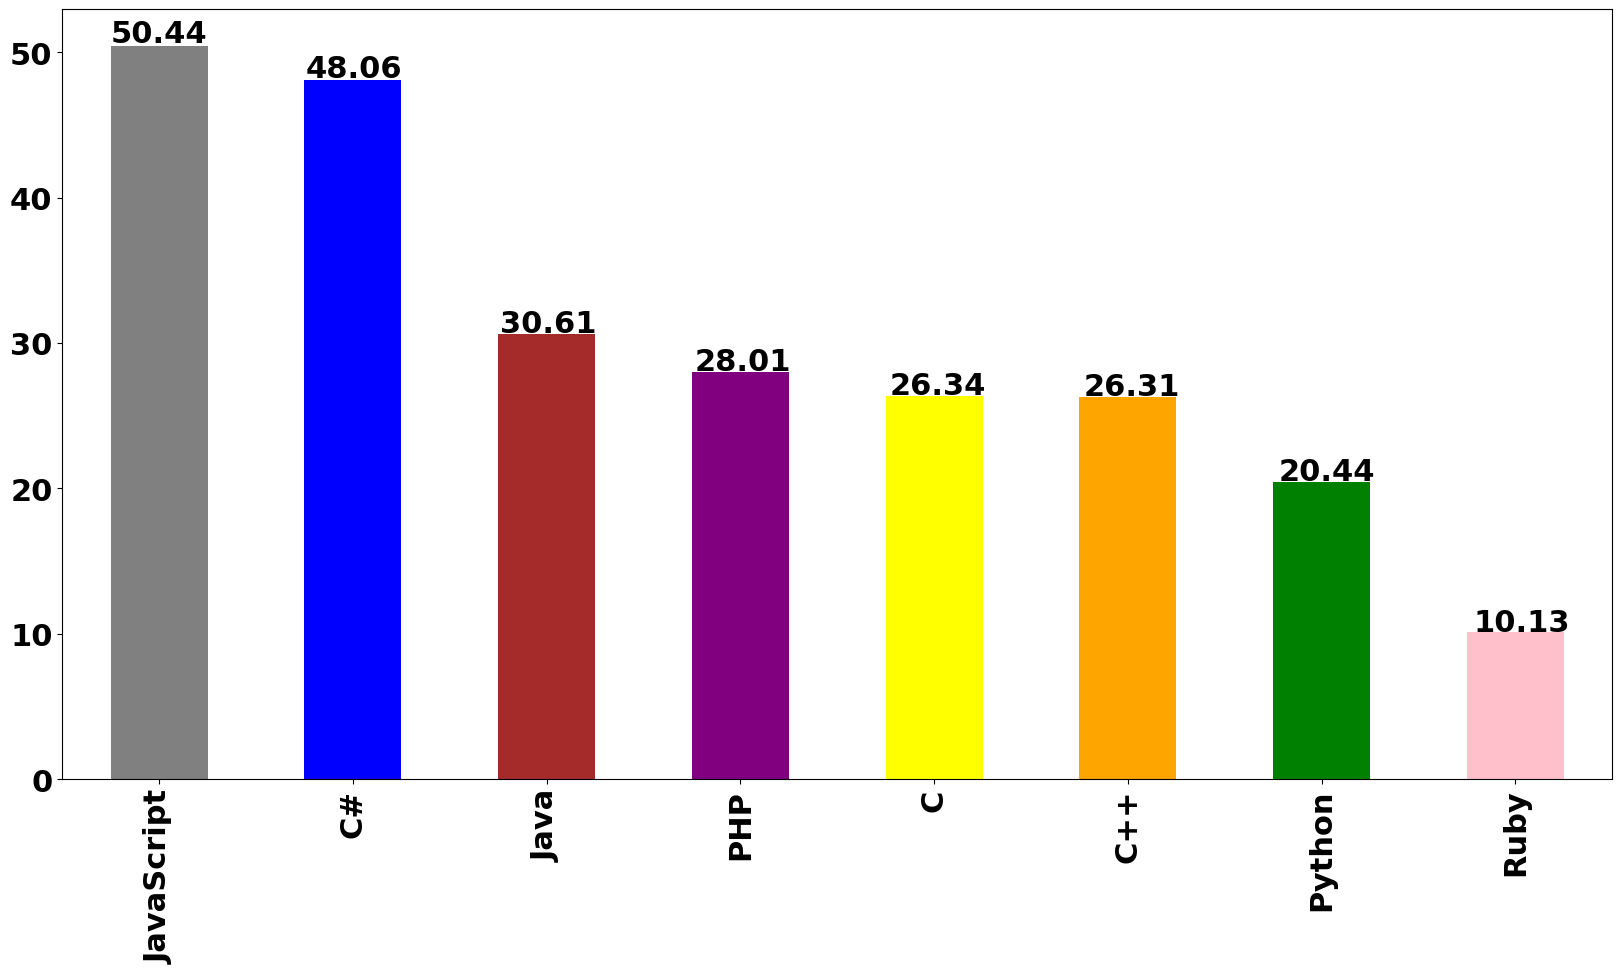

In [236]:
# plotting data
ax_11 = s_2011_proficiencies_percentages['top ten proficiency percentages'].plot(kind="bar", color=languages_palette_list)

# annotating values on top of each bar, for readability
for p in ax_11.patches:
    ax_11.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))


Hence, 2011 top 5 ranking would be:
1. JavaScript
2. C#
3. Java
4. PHP
5. C


In [237]:
# saving the plot
fig = ax_11.get_figure()
fig.savefig(os.path.join("..", "plots", 'Q1_2011.png'))  # Save the figure to a file

#### 2012 Results Analysis
Now I'll compute the answer to first question, referring to 2012 data:


##### Proficiencies from Raw Data
Computing top ten languages on raw data:

In [238]:
proficiency_columns_range_2012 = range(22,35)

# instantiating  a LanguagesStatsExtractor object
lre_12 = LanguagesRankingExtractor(df_surveys_12, columns_selection_criteria=proficiency_columns_range_2012, prefix_to_remove='Proficient in ')
# computing languages proficiency ranking in 2011
s_2012_proficiencies_stats = lre_12.get_stats()

In [239]:
# having a look at top ten most popular languages in 2011
s_2012_proficiencies_top_10 = s_2012_proficiencies_stats['top ten languages']
s_2012_proficiencies_top_10

SQL            3294
JavaScript     3127
CSS            2824
C#             2468
Java           2348
PHP            1925
C++            1526
C              1484
Python         1210
Objective-C     605
dtype: int64

Since we observed a few "non programming" languages in our top ten, we'd better look at the full ranking in order to spot and eliminate all of this kind of occurrence from the data:

In [240]:
s_2012_proficiencies_stats["full ranking"]

Proficient in SQL            3294
Proficient in JavaScript     3127
Proficient in CSS            2824
Proficient in C#             2468
Proficient in Java           2348
Proficient in PHP            1925
Proficient in C++            1526
Proficient in C              1484
Proficient in Python         1210
Proficient in Objective-C     605
Proficient in Ruby            577
Proficient in Perl            461
dtype: int64

##### Proficiencies from Clean Data
Computing top ten languages on clean data:

Again in top 10 we have SQL, CSS and HTML5 that are not programming languages and shall be removed from the top ten.

In [241]:
# dropping SQL and CSS from results
exclusion_list = ["Proficient in SQL", "Proficient in CSS"]
# computing top ten languages by proficiency in 2012

lre_12 = LanguagesRankingExtractor(df_surveys_12, columns_selection_criteria=proficiency_columns_range_2012, prefix_to_remove='Proficient in ', exclusion_list=exclusion_list)
# computing languages proficiency ranking in 2012
s_2012_proficiencies_stats = lre_12.get_stats()

Looking again at top proficiencies:

In [242]:
# having a look at top ten most popular languages in 2011
s_2012_proficiencies_top_10 = s_2011_proficiencies_stats['top ten languages']
s_2012_proficiencies_top_10

JavaScript    1419
C#            1352
Java           861
PHP            788
C              741
C++            740
Python         575
Ruby           285
dtype: int64

We can now assess the language popularity in absolute terms computing total percentage of coders using that
particular language:


In [243]:
# computing percentages
lpp_12 = LanguagesProficienciesPercentages(lre_12)

s_2012_proficiencies_percentages = lpp_12.get_stats()

In [244]:
s_2012_proficiencies_percentages['proficiency percentages']

Proficient in JavaScript     50.088099
Proficient in C#             39.532276
Proficient in Java           37.610123
Proficient in PHP            30.834535
Proficient in C++            24.443377
Proficient in C              23.770623
Proficient in Python         19.381708
Proficient in Objective-C     9.690854
Proficient in Ruby            9.242351
Proficient in Perl            7.384270
dtype: float64

In [245]:
s_2012_proficiencies_percentages['top ten proficiency percentages']

JavaScript     50.088099
C#             39.532276
Java           37.610123
PHP            30.834535
C++            24.443377
C              23.770623
Python         19.381708
Objective-C     9.690854
Ruby            9.242351
Perl            7.384270
dtype: float64

##### Histogram of most popular languages in 2012

###### Color Palette integration

Now I'll add missing languages to palette dictionary:

In [246]:
languages_palette

{'C': 'yellow',
 'C++': 'orange',
 'Python': 'green',
 'PHP': 'purple',
 'Ruby': 'pink',
 'JavaScript': 'grey',
 'C#': 'blue',
 'Java': 'brown',
 'Perl': '#add8e6'}

In [247]:
languages_palette['Objective-C'] = "#6699cc"

Mapping languages to related assigned color:


In [248]:
languages_palette_list = map_languages_to_color_list(languages_palette, s_2012_proficiencies_percentages['top ten proficiency percentages'])

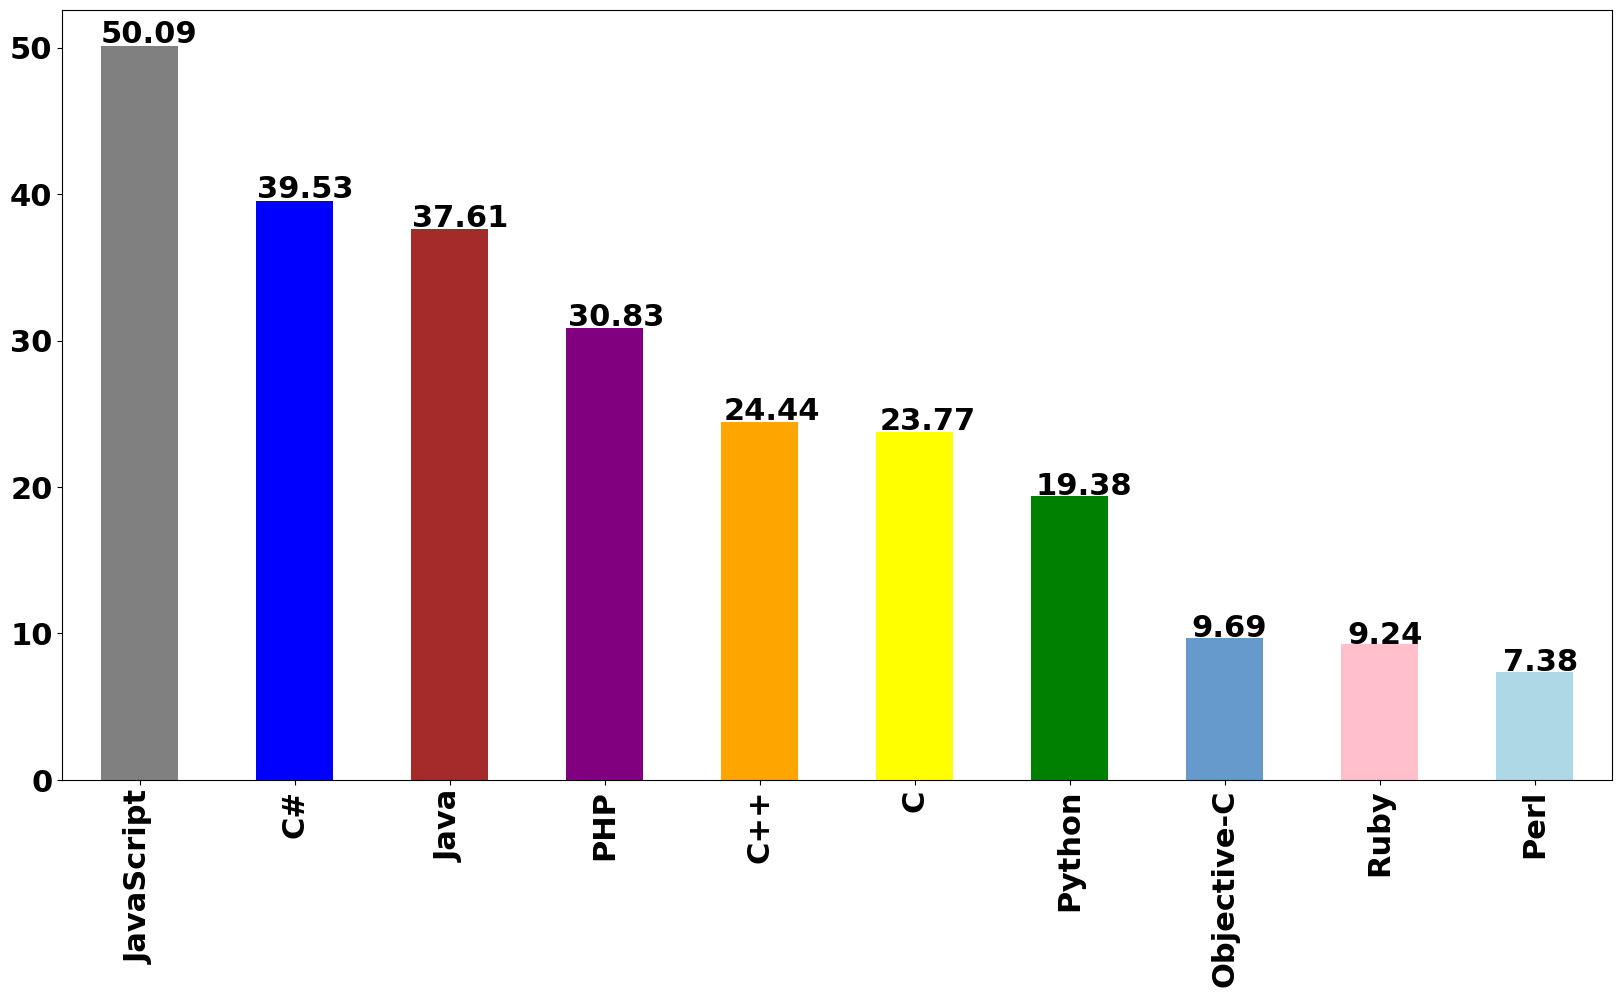

In [249]:
# plotting data
ax_12 = s_2012_proficiencies_percentages['top ten proficiency percentages'].plot.bar(color=languages_palette_list)
# annotating values on top of each bar, for readability
for p in ax_12.patches:
    ax_12.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))

Top 5 languages in 2012 are:
1. JavaScript
2. C#
3. Java
4. PHP
5. C++

Three main facts can be noted from this year results analysis:
1. C++ just overtook its "father" language C at 5th place
2. C# is not as popular as it was in 2011 respect to JavaScript
3. Objective-C has gained its first top ten appearance

In [250]:
# saving the plot
fig = ax_12.get_figure()
fig.savefig(os.path.join("..", "plots", 'Q1_2012.png'))  # Save the figure to a file

#### 2013 Results Analysis
Now I'll compute the answer to first question, referring to 2013 data:

In [251]:
proficiency_columns_range_2013 = range(56,69)

# instantiating  a LanguagesStatsExtractor object
lre_13 = LanguagesRankingExtractor(df_surveys_13, columns_selection_criteria=proficiency_columns_range_2013, prefix_to_remove='Proficient in ')
# computing languages proficiency ranking in 2013
s_2013_proficiencies_stats = lre_13.get_stats()


Looking at top ten languages in 2013

In [252]:
# having a look at top ten most popular languages in 2013
s_2013_proficiencies_top_10 = s_2013_proficiencies_stats['top ten languages']
s_2013_proficiencies_top_10

JavaScript     4735
jQuery         4109
C#             3027
Java           3020
PHP            2324
Python         1880
C++            1696
C              1436
Objective-C     955
Ruby            794
dtype: int64

In [253]:
s_2013_proficiencies_stats["full ranking"]

Proficient in JavaScript     4735
Proficient in jQuery         4109
Proficient in C#             3027
Proficient in Java           3020
Proficient in PHP            2324
Proficient in Python         1880
Proficient in C++            1696
Proficient in C              1436
Proficient in Objective-C     955
Proficient in Ruby            794
Proficient in Node.js         599
Proficient in JQuery          239
dtype: int64

I have to merge jQuery (which is actually a library) and Node.js to JavaScript,
in order to have a clean view on data:

In [254]:
# merge list
entries_merge_list = [("JavaScript", "jQuery"), ("JavaScript", "Node.js"), ("JavaScript", "JQuery")]
# instantiating  a LanguagesStatsExtractor object
lre_13 = LanguagesRankingExtractor(df_surveys_13, columns_selection_criteria=lang_prof_CROI_2013, prefix_to_remove='Proficient in ', entries_merge_list=entries_merge_list)
# computing languages proficiency ranking in 2013
s_2013_proficiencies_stats = lre_13.get_stats()

h:\workspace\stackoverflow_multiple_years\preparation\data_stats.py:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_proficiencies.drop(mergee, axis=1, inplace=True)
h:\workspace\stackoverflow_multiple_years\preparation\data_stats.py:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_proficiencies.drop(mergee, axis=1, inplace=True)
h:\workspace\stackoverflow_multiple_years\preparation\data_stats.py:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

Looking at clean top ten data from 2013:

In [255]:
# having a look at top ten most popular languages in 2013
s_2013_proficiencies_top_10 = s_2013_proficiencies_stats['top ten languages']
s_2013_proficiencies_top_10

JavaScript     5149
C#             3027
Java           3020
PHP            2324
Python         1880
C++            1696
C              1436
Objective-C     955
Ruby            794
dtype: int64

We can assess the language popularity in absolute terms computing total percentage of coders using that
particular language:


In [256]:
# computing percentages
lpp_13 = LanguagesProficienciesPercentages(lre_13)

s_2013_proficiencies_percentages = lpp_13.get_stats()

h:\workspace\stackoverflow_multiple_years\preparation\data_stats.py:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_proficiencies.drop(mergee, axis=1, inplace=True)
h:\workspace\stackoverflow_multiple_years\preparation\data_stats.py:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_proficiencies.drop(mergee, axis=1, inplace=True)
h:\workspace\stackoverflow_multiple_years\preparation\data_stats.py:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [257]:
s_2013_proficiencies_percentages['proficiency percentages']

Proficient in JavaScript     52.853623
Proficient in C#             31.071649
Proficient in Java           30.999795
Proficient in PHP            23.855471
Proficient in Python         19.297885
Proficient in C++            17.409156
Proficient in C              14.740300
Proficient in Objective-C     9.802915
Proficient in Ruby            8.150277
dtype: float64

In [258]:
s_2013_proficiencies_percentages['top ten proficiency percentages']

JavaScript     52.853623
C#             31.071649
Java           30.999795
PHP            23.855471
Python         19.297885
C++            17.409156
C              14.740300
Objective-C     9.802915
Ruby            8.150277
dtype: float64

Mapping languages to related assigned color:


In [259]:
languages_palette_list = map_languages_to_color_list(languages_palette, s_2013_proficiencies_percentages['top ten proficiency percentages'])

### Histogram of most popular languages in 2013

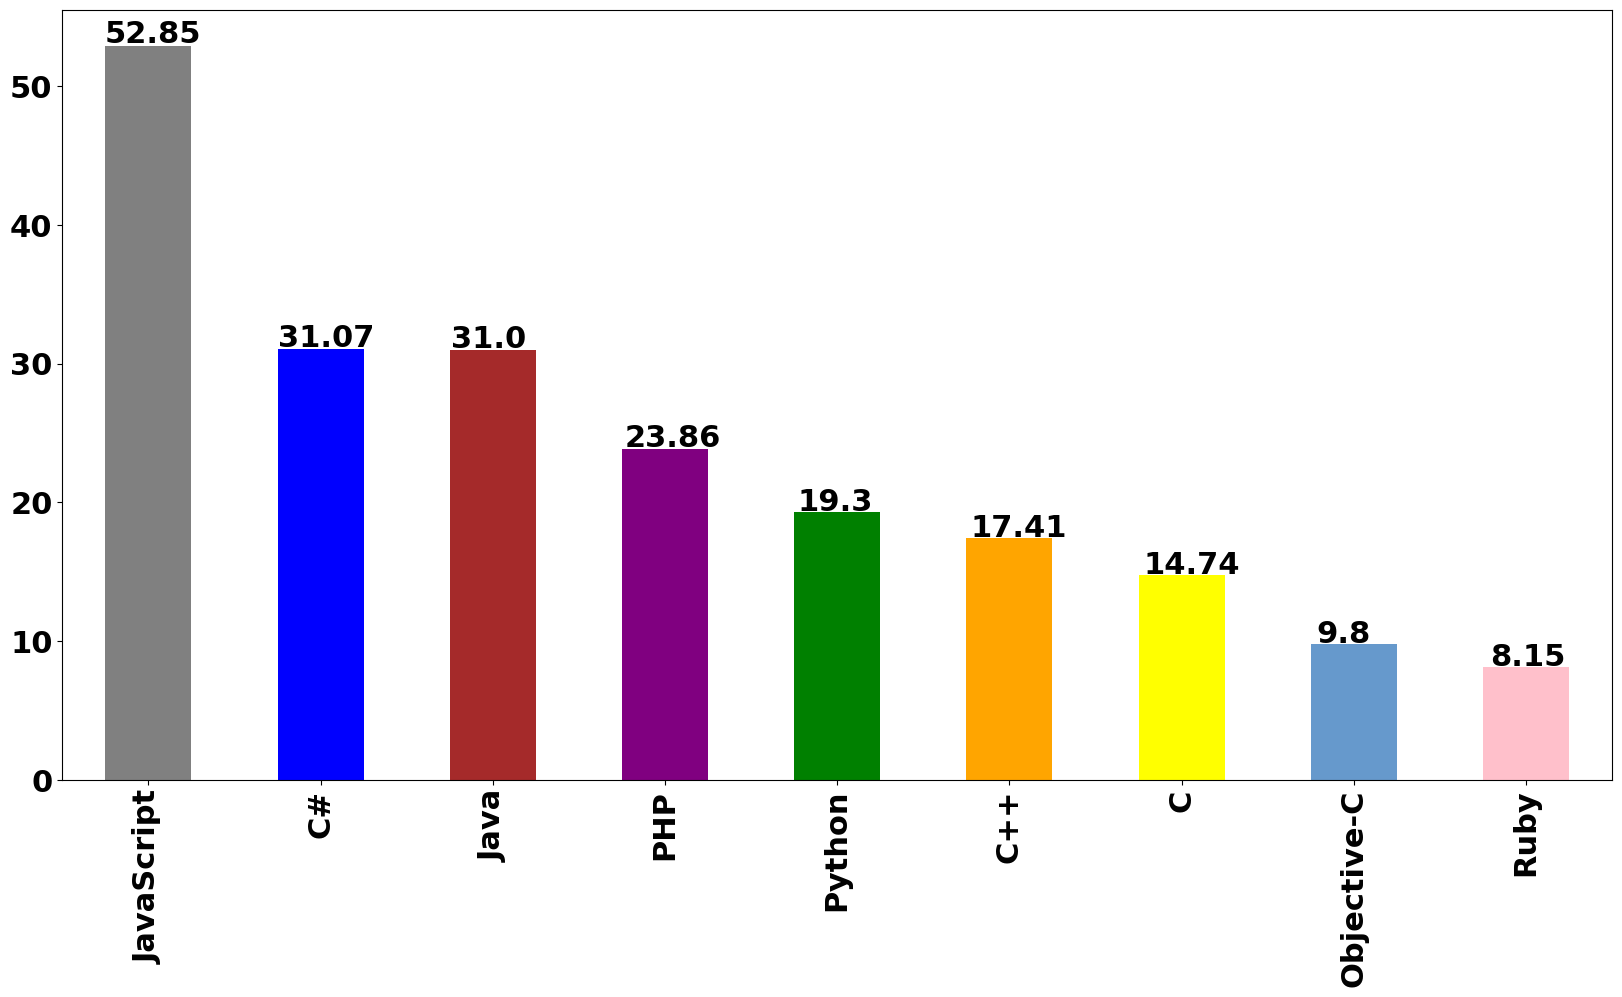

In [260]:
# plotting data

ax_13 = s_2013_proficiencies_percentages['top ten proficiency percentages'].plot.bar(color=languages_palette_list)
# annotating values on top of each bar, for readability
for p in ax_13.patches:
    ax_13.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))

Top 5 languages in 2013: <br>
1. JavaScript
2. C#
3. Java
4. PHP
5. Python <br>

Once more, in 2013 JavaScript was the most used language. Considering jQuery and Node.js as additional JavaScript proficiencies, about half of the respondents knows JavaScript. Following (but not so close) we can find C# and Java <br> (they're almost tied).

In [261]:
# saving the plot
fig = ax_13.get_figure()
fig.savefig(os.path.join("..", "plots", 'Q1_2013.png'))  # Save the figure to a file

#### 2014 Results Analysis
Now I'll compute the answer to first question, referring to 2014 data:


In [262]:
proficiency_columns_range_2014 = range(42,53)

# instantiating  a LanguagesStatsExtractor object
lre_14 = LanguagesRankingExtractor(df_surveys_14, columns_selection_criteria=proficiency_columns_range_2014, prefix_to_remove='Proficient in ')
# computing languages proficiency ranking in 2014
s_2014_proficiencies_stats = lre_14.get_stats()

In [263]:
# having a look at top ten most popular languages in 2013
s_2014_proficiencies_top_10 = s_2014_proficiencies_stats['top ten languages']
s_2014_proficiencies_top_10

JavaScript     3783
Java           2479
C#             2378
PHP            1710
Python         1473
C++            1418
C              1174
Objective-C     675
Node.js         641
Ruby            593
dtype: int64

Clearly, SQL and Node.js should be removed/merged with other entries. Let's have a look at full ranking before populating exclusion list.

In [264]:
s_2014_proficiencies_stats['full ranking']

Proficient in JavaScript     3783
Proficient in Java           2479
Proficient in C#             2378
Proficient in PHP            1710
Proficient in Python         1473
Proficient in C++            1418
Proficient in C              1174
Proficient in Objective-C     675
Proficient in Node.js         641
Proficient in Ruby            593
dtype: int64

In [265]:
entries_merge_list = [('JavaScript', 'Node.js')]

In [266]:
exclusion_list = ['Proficient in SQL']

In [267]:
# computing top ten languages by proficiency in 2013
# instantiating  a LanguagesStatsExtractor object


lre_14 = LanguagesRankingExtractor(df_surveys_14, columns_selection_criteria=proficiency_columns_range_2014, prefix_to_remove='Proficient in ', exclusion_list=exclusion_list, entries_merge_list=entries_merge_list)
# computing languages proficiency ranking in 2014
s_2014_proficiencies_stats = lre_14.get_stats()

error finding feature in axis


h:\workspace\stackoverflow_multiple_years\preparation\data_stats.py:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_proficiencies.drop(mergee, axis=1, inplace=True)


In [268]:
# having a look at top ten most popular languages in 2014
s_2014_proficiencies_stats['top ten languages']

JavaScript     3836
Java           2479
C#             2378
PHP            1710
Python         1473
C++            1418
C              1174
Objective-C     675
Ruby            593
dtype: int64

We can assess the language popularity in absolute terms computing total percentage of coders using that
particular language:


In [269]:
# computing percentages
lpp_14 = LanguagesProficienciesPercentages(lre_14)

s_2014_proficiencies_percentages = lpp_14.get_stats()

error finding feature in axis


h:\workspace\stackoverflow_multiple_years\preparation\data_stats.py:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_proficiencies.drop(mergee, axis=1, inplace=True)


In [270]:
s_2014_proficiencies_percentages['proficiency percentages']

Proficient in JavaScript     50.189716
Proficient in Java           32.434908
Proficient in C#             31.113437
Proficient in PHP            22.373414
Proficient in Python         19.272537
Proficient in C++            18.552924
Proficient in C              15.360461
Proficient in Objective-C     8.831611
Proficient in Ruby            7.758733
dtype: float64

In [271]:
s_2014_proficiencies_percentages['top ten proficiency percentages']

JavaScript     50.189716
Java           32.434908
C#             31.113437
PHP            22.373414
Python         19.272537
C++            18.552924
C              15.360461
Objective-C     8.831611
Ruby            7.758733
dtype: float64

Mapping languages to related assigned color:


In [272]:
languages_palette_list = map_languages_to_color_list(languages_palette, s_2014_proficiencies_percentages['top ten proficiency percentages'])

### Histogram of most popular languages in 2014

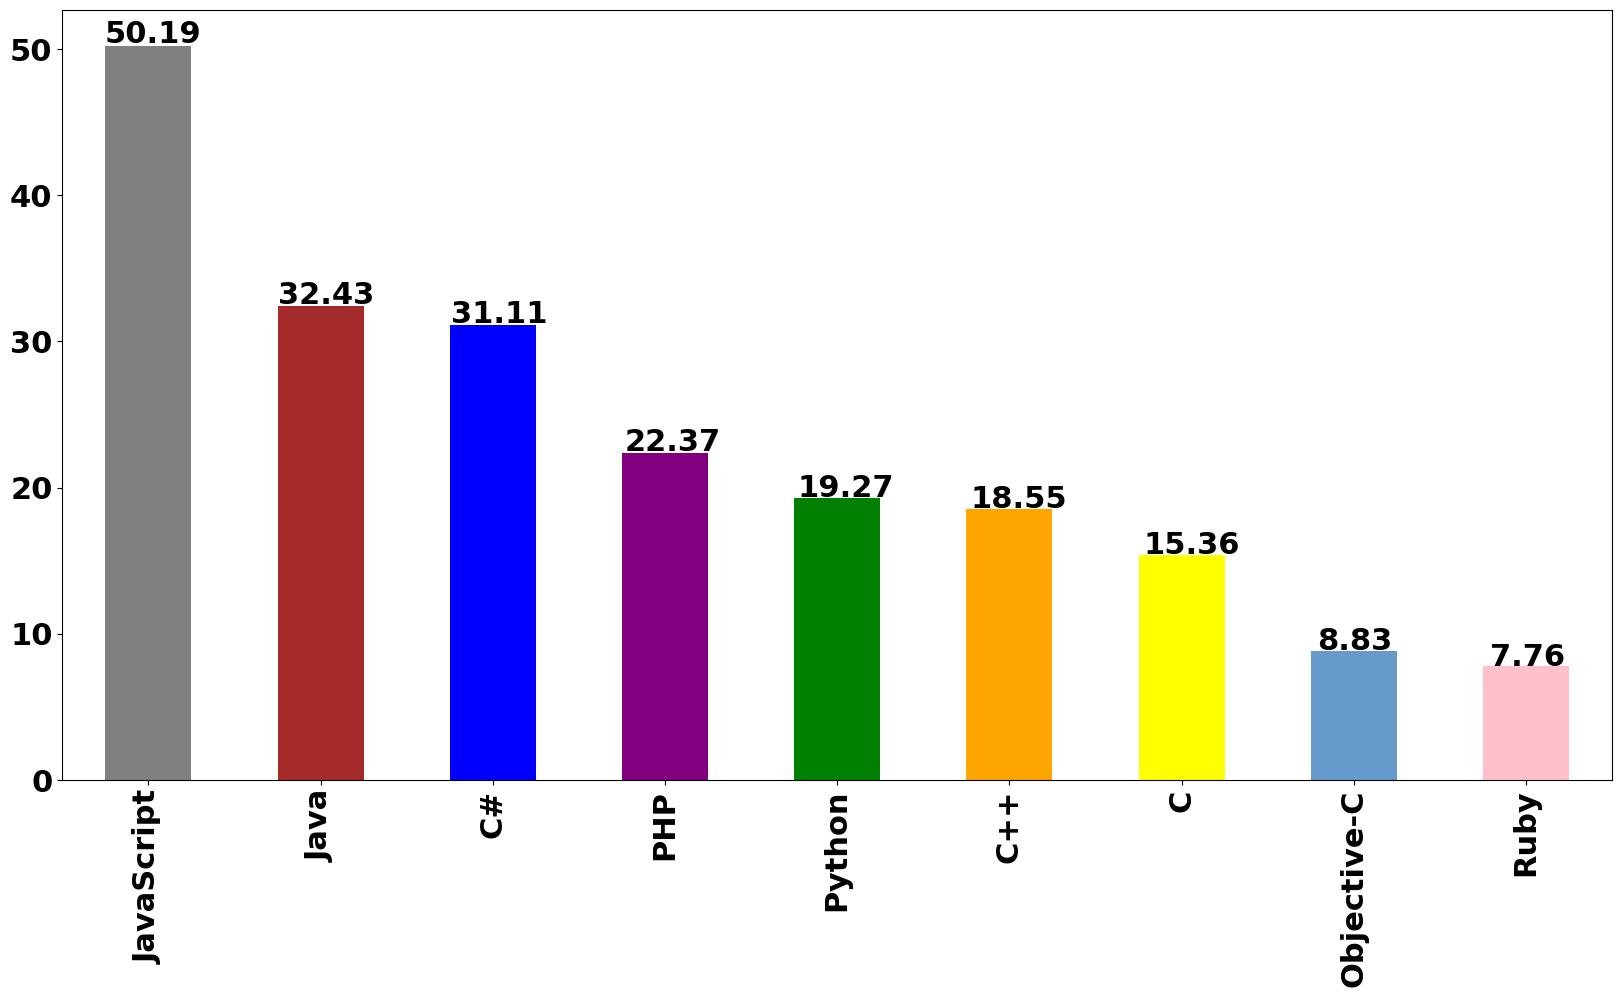

In [273]:
# plotting data

ax_14 = s_2014_proficiencies_percentages['top ten proficiency percentages'].plot.bar(color=languages_palette_list)
# annotating values on top of each bar, for readability
for p in ax_14.patches:
    ax_14.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))


Top 5 languages in 2014: <br>
1. JavaScript
2. Java
3. C#
4. PHP
5. Python

In [274]:
# saving the plot
fig = ax_14.get_figure()
fig.savefig(os.path.join("..", "plots", 'Q1_2014.png'))  # Save the figure to a file

#### 2015 Results Analysis
Now I'll compute the answer to first question, referring to 2015 data:

In [275]:
# instantiating  a LanguagesStatsExtractor object
lre_15 = LanguagesRankingExtractor(df_surveys_15, columns_selection_criteria=lang_prof_CROI_2015, prefix_to_remove='Current Lang & Tech: ')
# computing languages proficiency ranking in 2013
s_2015_proficiencies_stats = lre_15.get_stats()

In [276]:
# having a look at top ten most popular languages in 2015
s_2015_proficiencies_top_10 = s_2015_proficiencies_stats['top ten languages']
s_2015_proficiencies_top_10

JavaScript    11962
SQL            9439
Java           8219
C#             6949
PHP            6529
Python         5238
C++            4529
SQL Server     4129
Android        4110
C              3612
dtype: int64

SQL, SQL Server and Android are not programming languages  and have to be excluded from computations:

From the moment we may have other non-languages involved, let's have a look at full ranking before compiling exclusion list:

In [277]:
s_2015_proficiencies_stats['full ranking']

Current Lang & Tech: JavaScript       11962
Current Lang & Tech: SQL               9439
Current Lang & Tech: Java              8219
Current Lang & Tech: C#                6949
Current Lang & Tech: PHP               6529
Current Lang & Tech: Python            5238
Current Lang & Tech: C++               4529
Current Lang & Tech: SQL Server        4129
Current Lang & Tech: Android           4110
Current Lang & Tech: C                 3612
Current Lang & Tech: Node.js           2919
Current Lang & Tech: AngularJS         2913
Current Lang & Tech: iOS               1956
Current Lang & Tech: LAMP              1926
Current Lang & Tech: C++11             1851
Current Lang & Tech: Ruby              1765
Current Lang & Tech: MongoDB           1745
Current Lang & Tech: Objective-C       1719
Current Lang & Tech: Visual Basic      1701
Current Lang & Tech: Arduino           1626
Current Lang & Tech: Cloud             1410
Current Lang & Tech: Redis              873
Current Lang & Tech: Matlab     

In [278]:
exclusion_list = ["Current Lang & Tech: SQL", "Current Lang & Tech: SQL Server", "Current Lang & Tech: Android",
                  "Current Lang & Tech: iOS", "Current Lang & Tech: LAMP", "Current Lang & Tech: C++11", "Current Lang & Tech: MongoDB",
                  "Current Lang & Tech: Arduino", "Current Lang & Tech: Cloud", "Current Lang & Tech: Redis", "Current Lang & Tech: Cordova",
                  "Current Lang & Tech: Windows Phone", "Current Lang & Tech: Sharepoint", "Current Lang & Tech: Hadoop", "Current Lang & Tech: Cassandra",
                  "Current Lang & Tech: Salesforce", "Current Lang & Tech: Spark"]

entries_merge_list = [("JavaScript", "Node.js"), ("JavaScript", "AngularJS")]

In [279]:
# instantiating  a LanguagesStatsExtractor object
lre_15 = LanguagesRankingExtractor(df_surveys_15, columns_selection_criteria=lang_prof_CROI_2015, exclusion_list=exclusion_list, prefix_to_remove='Current Lang & Tech: ', entries_merge_list=entries_merge_list)
# computing languages proficiency ranking in 2013
s_2015_proficiencies_stats = lre_15.get_stats()

In [280]:
# having a look at top ten most popular languages in 2015
s_2015_proficiencies_top_10 = s_2015_proficiencies_stats['top ten languages']
s_2015_proficiencies_top_10

JavaScript      12433
Java             8219
C#               6949
PHP              6529
Python           5238
C++              4529
C                3612
Ruby             1765
Objective-C      1719
Visual Basic     1701
dtype: int64

We can now assess the language popularity in absolute terms computing total percentage
of coders using that particular language:

In [281]:
# computing percentages
lpp_15 = LanguagesProficienciesPercentages(lre_15)

s_2015_proficiencies_percentages = lpp_15.get_stats()

In [282]:
s_2015_proficiencies_percentages['proficiency percentages']

Current Lang & Tech: JavaScript      47.661581
Current Lang & Tech: Java            31.507322
Current Lang & Tech: C#              26.638810
Current Lang & Tech: PHP             25.028751
Current Lang & Tech: Python          20.079736
Current Lang & Tech: C++             17.361803
Current Lang & Tech: C               13.846508
Current Lang & Tech: Ruby             6.766081
Current Lang & Tech: Objective-C      6.589742
Current Lang & Tech: Visual Basic     6.520739
Current Lang & Tech: Matlab           3.296788
Current Lang & Tech: CoffeeScript     3.001610
Current Lang & Tech: Swift            2.909607
Current Lang & Tech: R                2.894273
Current Lang & Tech: Perl             2.829104
Current Lang & Tech: Scala            2.062409
Current Lang & Tech: Go               1.771065
Current Lang & Tech: Haskell          1.368550
Current Lang & Tech: Clojure          0.674691
Current Lang & Tech: F#               0.667024
Current Lang & Tech: Dart             0.417849
Current Lang 

In [283]:
s_2015_proficiencies_percentages['top ten proficiency percentages']

JavaScript      47.661581
Java            31.507322
C#              26.638810
PHP             25.028751
Python          20.079736
C++             17.361803
C               13.846508
Ruby             6.766081
Objective-C      6.589742
Visual Basic     6.520739
dtype: float64

### Histogram of most popular languages in 2015

Mapping languages to related assigned color:


In [284]:
# Savoy Blue
languages_palette['Visual Basic'] = "#0A36AF"

In [285]:
languages_palette_list = map_languages_to_color_list(languages_palette, s_2015_proficiencies_percentages['top ten proficiency percentages'])

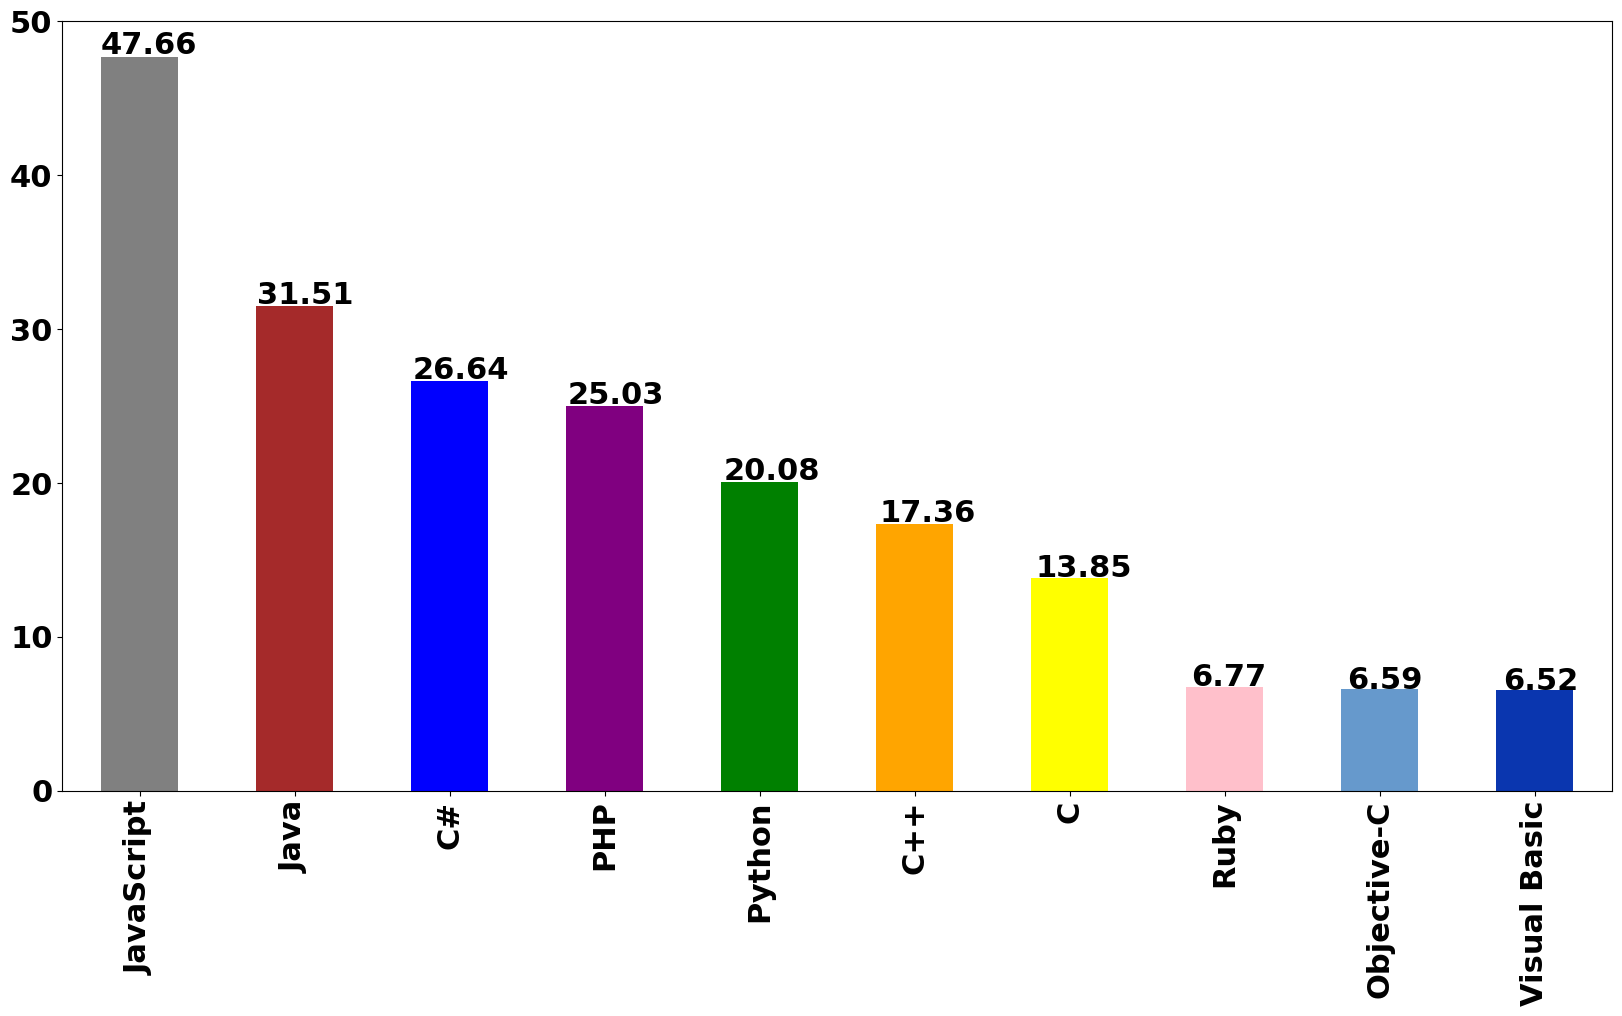

In [286]:
# plotting data
ax_15 = s_2015_proficiencies_percentages['top ten proficiency percentages'].plot.bar(color=languages_palette_list)
# annotating values on top of each bar, for readability
for p in ax_15.patches:
    ax_15.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))

Top 5 languages in 2015: <br>
1. JavaScript
2. Java
3. C#
4. PHP
5. Python



Top 5 languages standings, in 2015 was unchanged respect to 2014.

In [287]:
# saving the plot
fig = ax_15.get_figure()
fig.savefig(os.path.join("..", "plots", 'Q1_2015.png'))  # Save the figure to a file

#### 2016 Results Analysis
Now I'll compute the answer to first question, referring to 2016 data:


In [288]:
# instantiating  a LanguagesStatsExtractor object
lre_16 = LanguagesRankingExtractor(df_surveys_16, columns_selection_criteria=lang_prof_CROI_2016, prefix_to_remove='tech_do: ')

# computing languages proficiency ranking in 2013
s_2016_proficiencies_stats = lre_16.get_stats()

In [289]:
s_2016_proficiencies_stats['top ten languages']

JavaScript    27385.0
Java          17942.0
C#            15283.0
PHP           12780.0
Python        12282.0
C++            9589.0
AngularJS      8823.0
Android        8601.0
Node.js        8509.0
C              7678.0
dtype: float64

[AngularJS](https://en.wikipedia.org/wiki/AngularJS) and [Node.js](https://en.wikipedia.org/wiki/Node.js) are JavaScript-based framework, hence, it should be merged with JavaScript. Let's have a look at full ranking before proceeding to data cleaning parameters initialization:

In [290]:
s_2016_proficiencies_stats['full ranking']

tech_do: JavaScript                       27385.0
tech_do: Java                             17942.0
tech_do: C#                               15283.0
tech_do: PHP                              12780.0
tech_do: Python                           12282.0
tech_do: C++                               9589.0
tech_do: AngularJS                         8823.0
tech_do: Android                           8601.0
tech_do: Node.js                           8509.0
tech_do: C                                 7678.0
tech_do: LAMP                              4821.0
tech_do: MongoDB                           4780.0
tech_do: Cloud (AWS, GAE, Azure, etc.)     4629.0
tech_do: iOS                               4498.0
tech_do: Ruby                              4383.0
tech_do: Arduino / Raspberry Pi            3797.0
tech_do: Objective-C                       3202.0
tech_do: Redis                             2862.0
tech_do: ReactJS                           2541.0
tech_do: CoffeeScript                      1662.0


In [291]:
exclusion_list = ["tech_do: LAMP", "tech_do: MongoDB", "tech_do: Cloud (AWS, GAE, Azure, etc.)", "tech_do: iOS", "tech_do: Arduino / Raspberry Pi",
                  "tech_do: Redis", "tech_do: Cordova", "tech_do: Hadoop", "tech_do: Salesforce", "tech_do: Cassandra", "tech_do: Android"]
entries_merge_list = [("JavaScript", "AngularJS"), ("JavaScript", "Node.js"), ("JavaScript", "ReactJS")]

In [292]:
lre_16 = LanguagesRankingExtractor(df_surveys_16, columns_selection_criteria=lang_prof_CROI_2016, prefix_to_remove='tech_do: ', exclusion_list= exclusion_list, entries_merge_list=entries_merge_list)

In [293]:
s_2016_proficiencies_stats = lre_16.get_stats()

In [294]:
s_2016_proficiencies_stats['top ten languages']

JavaScript      28904.0
Java            17942.0
C#              15283.0
PHP             12780.0
Python          12282.0
C++              9589.0
C                7678.0
Ruby             4383.0
Objective-C      3202.0
CoffeeScript     1662.0
dtype: float64

We can now assess the language popularity in absolute terms computing total percentage
of coders using that particular language:

In [295]:
# computing percentages
lpp_16 = LanguagesProficienciesPercentages(lre_16)

s_2016_proficiencies_percentages = lpp_16.get_stats()

In [296]:
s_2016_proficiencies_percentages['proficiency percentages']

tech_do: JavaScript      51.586650
tech_do: Java            32.022131
tech_do: C#              27.276459
tech_do: PHP             22.809209
tech_do: Python          21.920400
tech_do: C++             17.114046
tech_do: C               13.703373
tech_do: Ruby             7.822595
tech_do: Objective-C      5.714796
tech_do: CoffeeScript     2.966268
tech_do: R                2.912725
tech_do: Perl             2.898447
tech_do: Matlab           2.859183
tech_do: Go               2.761021
tech_do: Haskell          1.451008
tech_do: Clojure          0.992326
tech_do: F#               0.863823
tech_do: Rust             0.778155
tech_do: Dart             0.396216
dtype: float64

In [297]:
s_2016_proficiencies_percentages['top ten proficiency percentages']

JavaScript      51.586650
Java            32.022131
C#              27.276459
PHP             22.809209
Python          21.920400
C++             17.114046
C               13.703373
Ruby             7.822595
Objective-C      5.714796
CoffeeScript     2.966268
dtype: float64

Adding "CoffeeScript" language color to palette

In [298]:
# Coffee Brown color
languages_palette['CoffeeScript'] = "#4a2c2a"

Mapping languages to colors

In [299]:
languages_palette_list = map_languages_to_color_list(languages_palette, s_2016_proficiencies_percentages['top ten proficiency percentages'])

### Histogram of most popular languages in 2016

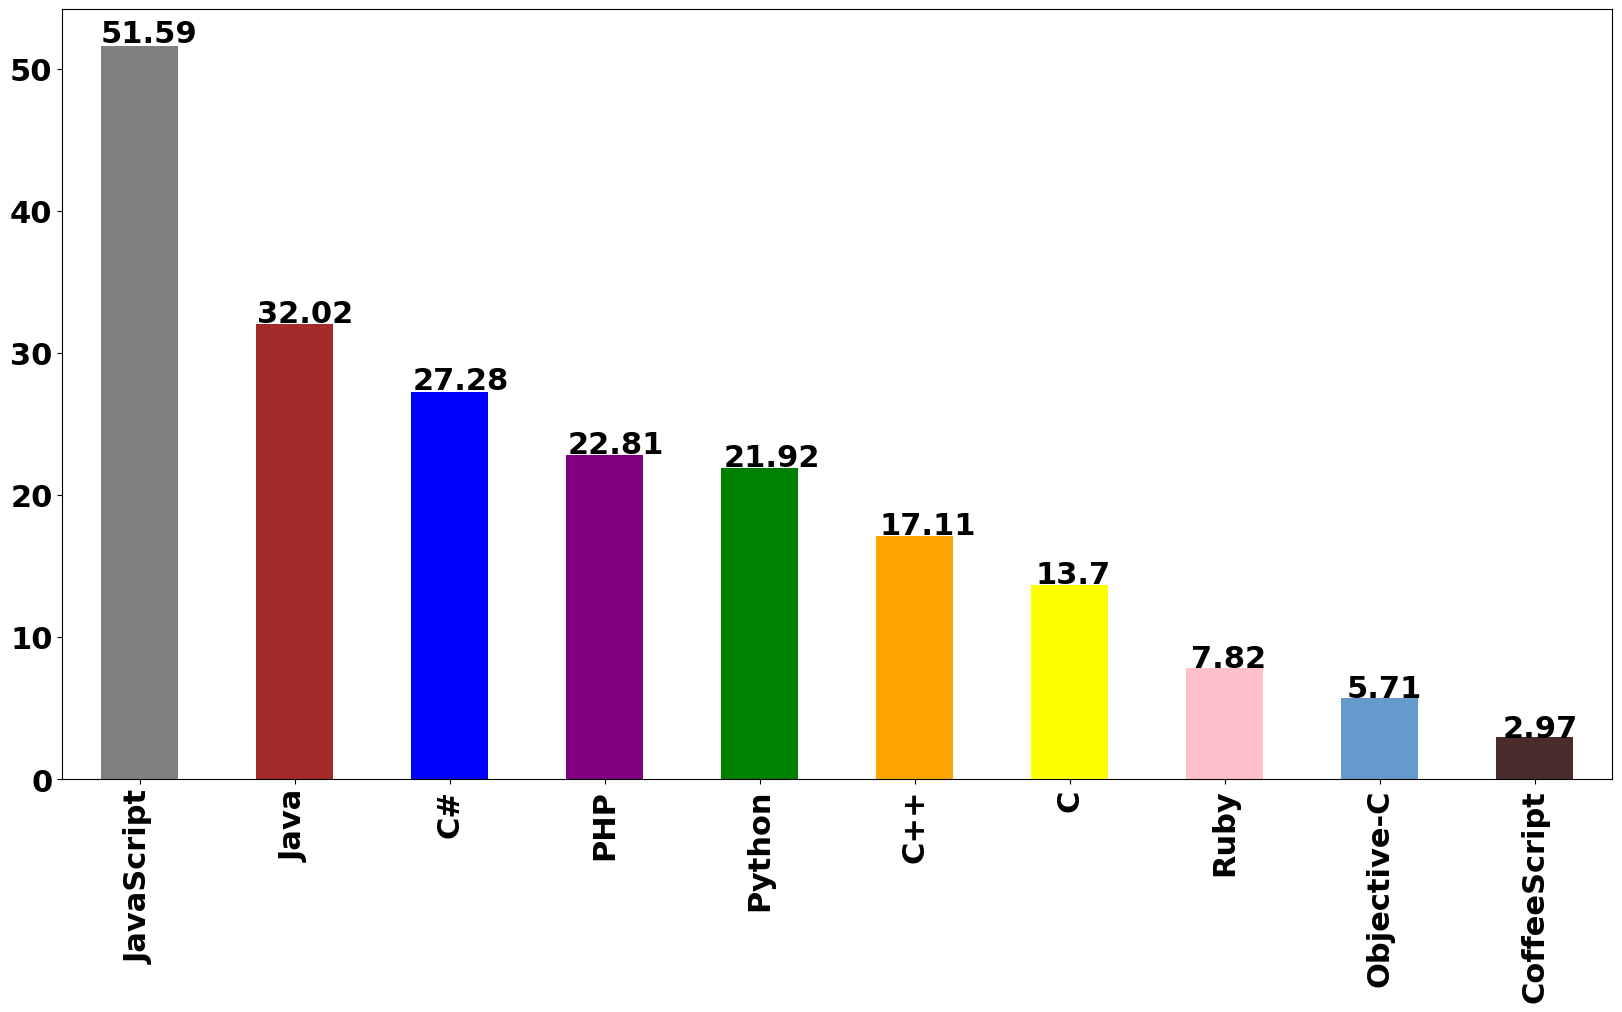

In [300]:
# plotting data
ax_16 = s_2016_proficiencies_percentages['top ten proficiency percentages'].plot.bar(color=languages_palette_list)
# annotating values on top of each bar, for readability
for p in ax_16.patches:
    ax_16.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))

Top 5 languages in 2016: <br>
1. JavaScript
2. Java
3. C#
4. PHP
5. Python



Top 5 languages standings, in 2016 was unchanged respect to 2015, some minor changes in other top ten position has occurred, in particular, Visual Basic has been replaced by the new entry CoffeeScript.

Top 5 languages in 2016: <br>
1. JavaScript
2. Java
3. C#
4. PHP
5. Python<br>

In [301]:
# saving the plot
fig = ax_16.get_figure()
fig.savefig(os.path.join("..", "plots", 'Q1_2016.png'))  # Save the figure to a file

#### 2017 Results Analysis
Now I'll compute the answer to first question, referring to 2017 data:


In [302]:
# instantiating  a LanguagesStatsExtractor object
lre_17 = LanguagesRankingExtractor(df_surveys_17, columns_selection_criteria="HaveWorkedLanguage", prefix_to_remove='HaveWorkedLanguage: ')

# computing languages proficiency ranking in 2017
s_2017_proficiencies_stats = lre_17.get_stats()

In [303]:
s_2017_proficiencies_stats['top ten languages']

JavaScript    22875.0
SQL           18754.0
Java          14524.0
C#            12476.0
Python        11704.0
PHP           10290.0
C++            8155.0
C              6974.0
TypeScript     3488.0
Ruby           3324.0
dtype: float64

[TypeScript](https://en.wikipedia.org/wiki/TypeScript) is a superset of JavaScript, as well as [C++](https://en.wikipedia.org/wiki/C%2B%2B) can be considered a superset of [C](https://en.wikipedia.org/wiki/C_(programming_language)). Therefore, no merging will be done on top ten entries this time.

To get an overvies, here follows the full ranking of languages by popularity in 2017:

In [304]:
s_2017_proficiencies_stats['full ranking']

HaveWorkedLanguage: JavaScript        22875.0
HaveWorkedLanguage: SQL               18754.0
HaveWorkedLanguage: Java              14524.0
HaveWorkedLanguage: C#                12476.0
HaveWorkedLanguage: Python            11704.0
HaveWorkedLanguage: PHP               10290.0
HaveWorkedLanguage: C++                8155.0
HaveWorkedLanguage: C                  6974.0
HaveWorkedLanguage: TypeScript         3488.0
HaveWorkedLanguage: Ruby               3324.0
HaveWorkedLanguage: Swift              2368.0
HaveWorkedLanguage: Objective-C        2349.0
HaveWorkedLanguage: VB.NET             2273.0
HaveWorkedLanguage: Assembly           1823.0
HaveWorkedLanguage: R                  1634.0
HaveWorkedLanguage: Perl               1585.0
HaveWorkedLanguage: VBA                1574.0
HaveWorkedLanguage: Matlab             1569.0
HaveWorkedLanguage: Go                 1557.0
HaveWorkedLanguage: Scala              1309.0
HaveWorkedLanguage: Groovy             1193.0
HaveWorkedLanguage: CoffeeScript  

SQL shall be excluded and, as a consequence, [Swift](https://en.wikipedia.org/wiki/Swift_(programming_language)) will come up in Top Ten.

In [305]:
exclusion_list= ["HaveWorkedLanguage: SQL"]

In [306]:
# instantiating  a LanguagesStatsExtractor object
lre_17 = LanguagesRankingExtractor(df_surveys_17, columns_selection_criteria="HaveWorkedLanguage", prefix_to_remove='HaveWorkedLanguage: ', exclusion_list=exclusion_list)

# computing languages proficiency ranking in 2017
s_2017_proficiencies_stats = lre_17.get_stats()

In [307]:
s_2017_proficiencies_stats['top ten languages']

JavaScript    22875.0
Java          14524.0
C#            12476.0
Python        11704.0
PHP           10290.0
C++            8155.0
C              6974.0
TypeScript     3488.0
Ruby           3324.0
Swift          2368.0
dtype: float64

We can now assess the language popularity in absolute terms computing total percentage
of coders using that particular language:

In [308]:
# computing percentages
lpp_17 = LanguagesProficienciesPercentages(lre_17)

s_2017_proficiencies_percentages = lpp_17.get_stats()

In [309]:
s_2017_proficiencies_percentages['proficiency percentages']

HaveWorkedLanguage: JavaScript        44.510819
HaveWorkedLanguage: Java              28.261208
HaveWorkedLanguage: C#                24.276152
HaveWorkedLanguage: Python            22.773973
HaveWorkedLanguage: PHP               20.022572
HaveWorkedLanguage: C++               15.868229
HaveWorkedLanguage: C                 13.570205
HaveWorkedLanguage: TypeScript         6.787049
HaveWorkedLanguage: Ruby               6.467933
HaveWorkedLanguage: Swift              4.607721
HaveWorkedLanguage: Objective-C        4.570750
HaveWorkedLanguage: VB.NET             4.422867
HaveWorkedLanguage: Assembly           3.547245
HaveWorkedLanguage: R                  3.179483
HaveWorkedLanguage: Perl               3.084138
HaveWorkedLanguage: VBA                3.062733
HaveWorkedLanguage: Matlab             3.053004
HaveWorkedLanguage: Go                 3.029654
HaveWorkedLanguage: Scala              2.547089
HaveWorkedLanguage: Groovy             2.321373
HaveWorkedLanguage: CoffeeScript       2

Adding "TypeScript" and "Swift" languages colors to palette

In [310]:
# Spindle Tree color
languages_palette['TypeScript'] = "#6D8F3E"
# Dark Orange color
languages_palette['Swift'] = "#ff8c00"

Mapping languages to colors

In [311]:
languages_palette_list = map_languages_to_color_list(languages_palette, s_2017_proficiencies_percentages['top ten proficiency percentages'])

### Histogram of most popular languages in 2017

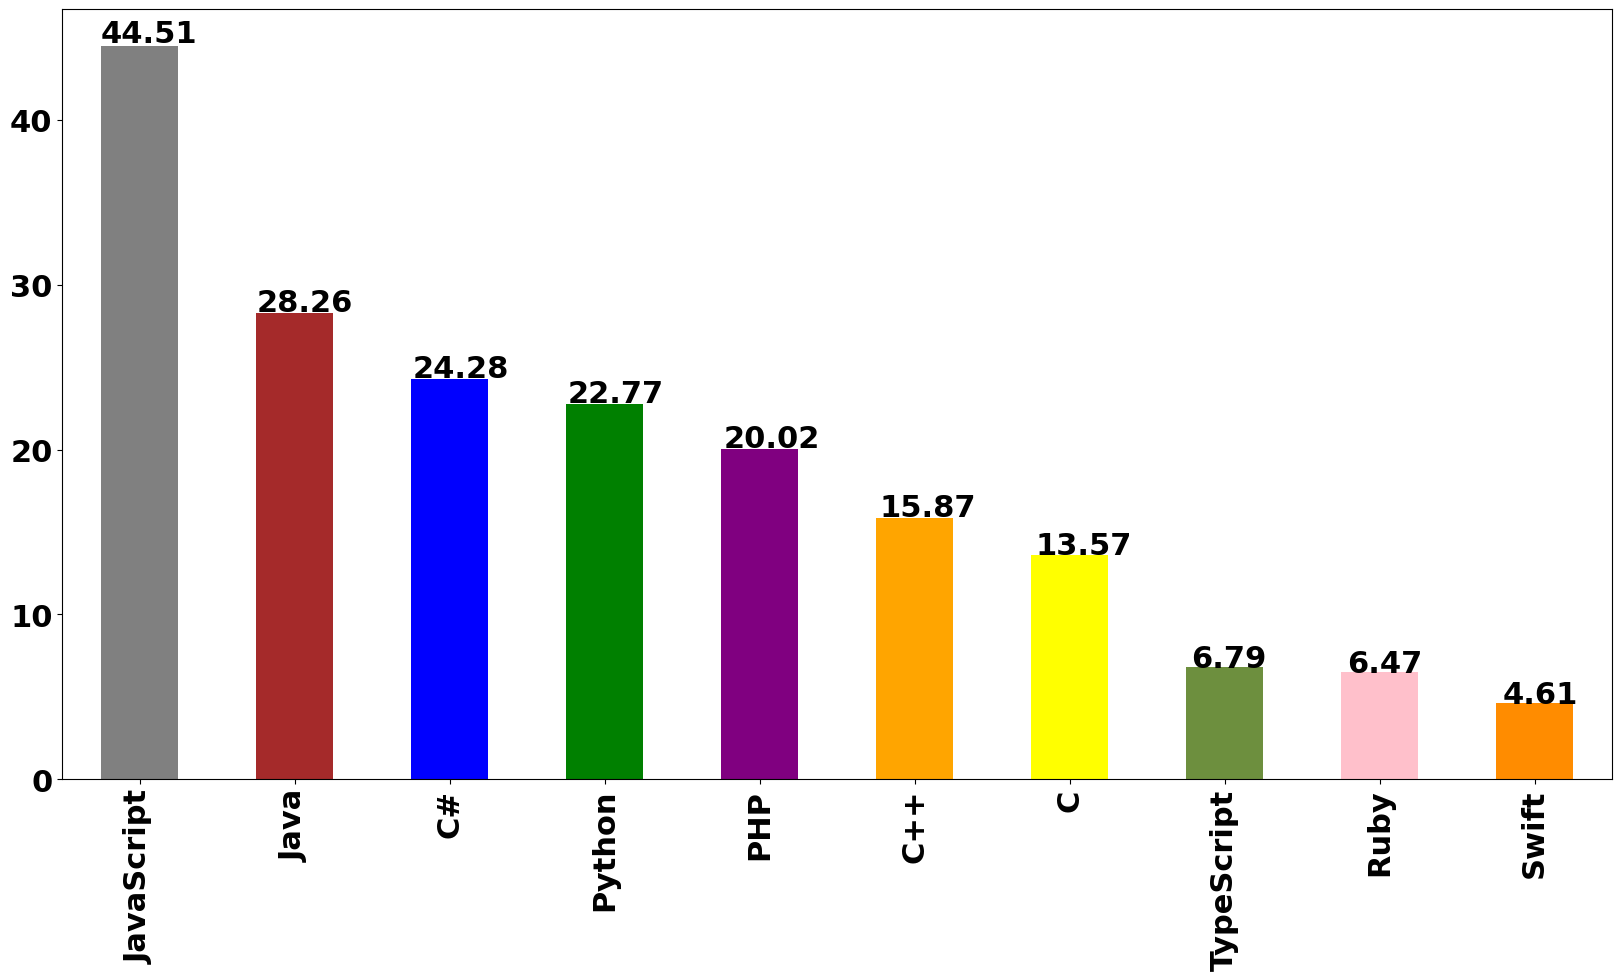

In [312]:
# plotting data
ax_17 = s_2017_proficiencies_percentages['top ten proficiency percentages'].plot.bar(color=languages_palette_list)
# annotating values on top of each bar, for readability
for p in ax_17.patches:
    ax_17.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))

Top 5 languages in 2017: <br>
1. JavaScript
2. Java
3. C#
4. Python
5. PHP



This year, three big changes can be spotted:
1. Python took over PHP att 4th position;
2. TypeScript got to the top ten at 8th position (leaving CoffeeScript out of it);
3. Swift joined the top ten at 10th position.

In [313]:
# saving the plot
fig = ax_17.get_figure()
fig.savefig(os.path.join("..", "plots", 'Q1_2017.png'))  # Save the figure to a file

#### 2018 Results Analysis
Now I'll compute the answer to first question, referring to 2018 data:


In [314]:
# instantiating  a LanguagesStatsExtractor object
lre_18 = LanguagesRankingExtractor(df_surveys_18, columns_selection_criteria="LanguageWorkedWith", prefix_to_remove='LanguageWorkedWith: ')

# computing languages proficiency ranking in 2018
s_2018_proficiencies_stats = lre_18.get_stats()

In [315]:
s_2018_proficiencies_stats['top ten languages']

JavaScript    54686.0
HTML          53628.0
CSS           50979.0
SQL           44670.0
Java          35521.0
Bash/Shell    31172.0
Python        30359.0
C#            26954.0
PHP           24071.0
C++           19872.0
dtype: float64

To be noticed: **Bash/Shell** is a very much interesting new entry, but it is to be counted among the "Domain Specific Languages", so not to be kept into the analysis.

In [316]:
# instantiating  a LanguagesStatsExtractor object
lre_18 = LanguagesRankingExtractor(df_surveys_18, columns_selection_criteria="LanguageWorkedWith", prefix_to_remove='LanguageWorkedWith: ', exclusion_list=['LanguageWorkedWith: HTML', 'LanguageWorkedWith: CSS', 'LanguageWorkedWith: SQL', 'LanguageWorkedWith: Bash/Shell'])
# computing languages proficiency ranking in 2018
s_2018_proficiencies_stats = lre_18.get_stats()

In [317]:
# computing percentages
lpp_18 = LanguagesProficienciesPercentages(lre_18)

s_2018_proficiencies_percentages = lpp_18.get_stats()

In [318]:
s_2018_proficiencies_percentages['proficiency percentages']

LanguageWorkedWith: JavaScript              55.319407
LanguageWorkedWith: Java                    35.932426
LanguageWorkedWith: Python                  30.710637
LanguageWorkedWith: C#                      27.266198
LanguageWorkedWith: PHP                     24.349805
LanguageWorkedWith: C++                     20.102170
LanguageWorkedWith: C                       18.250974
LanguageWorkedWith: TypeScript              13.783825
LanguageWorkedWith: Ruby                     8.002630
LanguageWorkedWith: Swift                    6.383086
LanguageWorkedWith: Assembly                 5.826716
LanguageWorkedWith: Go                       5.596075
LanguageWorkedWith: Objective-C              5.573820
LanguageWorkedWith: VB.NET                   5.314855
LanguageWorkedWith: R                        4.868747
LanguageWorkedWith: Matlab                   4.616863
LanguageWorkedWith: VBA                      3.854130
LanguageWorkedWith: Kotlin                   3.548632
LanguageWorkedWith: Scala   

### Histogram of most popular languages in 2018

In [319]:
# Coffee Brown color
#"languages_palette['Bash/Shell'] = "#000000"

Mapping languages to colors

In [320]:
languages_palette_list = map_languages_to_color_list(languages_palette, s_2018_proficiencies_percentages['top ten proficiency percentages'])

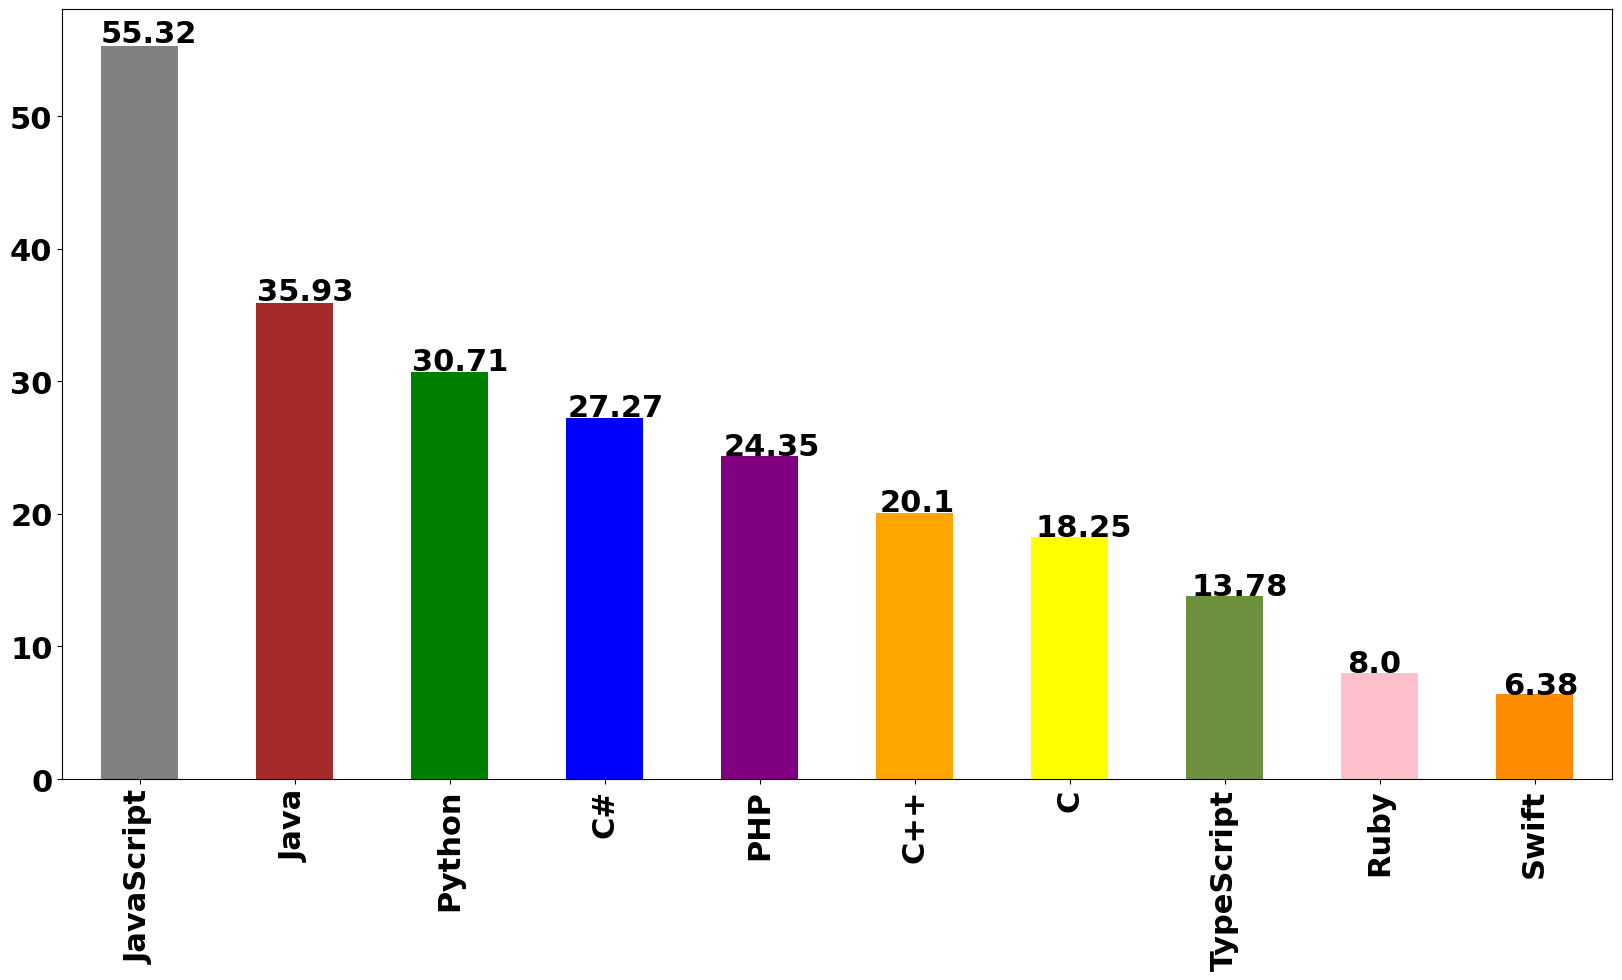

In [321]:
# plotting data
ax_18 = s_2018_proficiencies_percentages['top ten proficiency percentages'].plot.bar(color=languages_palette_list)
# annotating values on top of each bar, for readability
for p in ax_18.patches:
    ax_18.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))

Top 5 languages in 2018: <br>
1. JavaScript
2. Java
3. Python
4. C#
5. PHP


In [322]:
# saving the plot
fig = ax_18.get_figure()
fig.savefig(os.path.join("..", "plots", 'Q1_2018.png'))  # Save the figure to a file

#### 2019 Results Analysis
Now I'll compute the answer to first question, referring to 2019 data:

In [323]:
# instantiating  a LanguagesStatsExtractor object
lre_19 = LanguagesRankingExtractor(df_surveys_19, columns_selection_criteria="LanguageWorkedWith", prefix_to_remove='LanguageWorkedWith: ')

# computing languages proficiency ranking in 2019
s_2019_proficiencies_stats = lre_19.get_stats()

In [324]:
s_2019_proficiencies_stats['top ten languages']

JavaScript               59219.0
HTML/CSS                 55466.0
SQL                      47544.0
Python                   36443.0
Java                     35917.0
Bash/Shell/PowerShell    31991.0
C#                       27097.0
PHP                      23030.0
C++                      20524.0
TypeScript               18523.0
dtype: float64

Let's see if we have other "non-language entries" in the full ranking:

In [325]:
s_2019_proficiencies_stats['full ranking']

LanguageWorkedWith: JavaScript               59219.0
LanguageWorkedWith: HTML/CSS                 55466.0
LanguageWorkedWith: SQL                      47544.0
LanguageWorkedWith: Python                   36443.0
LanguageWorkedWith: Java                     35917.0
LanguageWorkedWith: Bash/Shell/PowerShell    31991.0
LanguageWorkedWith: C#                       27097.0
LanguageWorkedWith: PHP                      23030.0
LanguageWorkedWith: C++                      20524.0
LanguageWorkedWith: TypeScript               18523.0
LanguageWorkedWith: C                        18017.0
LanguageWorkedWith: Other(s):                 7920.0
LanguageWorkedWith: Ruby                      7331.0
LanguageWorkedWith: Go                        7201.0
LanguageWorkedWith: Assembly                  5833.0
LanguageWorkedWith: Swift                     5744.0
LanguageWorkedWith: Kotlin                    5620.0
LanguageWorkedWith: R                         5048.0
LanguageWorkedWith: VBA                       

In [326]:
lre_19 = LanguagesRankingExtractor(df_surveys_19, columns_selection_criteria="LanguageWorkedWith", prefix_to_remove='LanguageWorkedWith: ', exclusion_list=['LanguageWorkedWith: HTML/CSS', 'LanguageWorkedWith: SQL', 'LanguageWorkedWith: Other(s):', 'LanguageWorkedWith: Bash/Shell/PowerShell'])

s_2019_proficiencies_stats = lre_19.get_stats()

In [327]:
s_2019_proficiencies_stats['top ten languages']

JavaScript    59219.0
Python        36443.0
Java          35917.0
C#            27097.0
PHP           23030.0
C++           20524.0
TypeScript    18523.0
C             18017.0
Ruby           7331.0
Go             7201.0
dtype: float64

In [328]:
# computing percentages
lpp_19 = LanguagesProficienciesPercentages(lre_19)

s_2019_proficiencies_percentages = lpp_19.get_stats()

In [329]:
s_2019_proficiencies_percentages['proficiency percentages']

LanguageWorkedWith: JavaScript     66.625789
LanguageWorkedWith: Python         41.001091
LanguageWorkedWith: Java           40.409302
LanguageWorkedWith: C#             30.486145
LanguageWorkedWith: PHP            25.910467
LanguageWorkedWith: C++            23.091030
LanguageWorkedWith: TypeScript     20.839756
LanguageWorkedWith: C              20.270468
LanguageWorkedWith: Ruby            8.247921
LanguageWorkedWith: Go              8.101662
LanguageWorkedWith: Assembly        6.562560
LanguageWorkedWith: Swift           6.462428
LanguageWorkedWith: Kotlin          6.322919
LanguageWorkedWith: R               5.679376
LanguageWorkedWith: VBA             5.378981
LanguageWorkedWith: Objective-C     4.715187
LanguageWorkedWith: Scala           3.722872
LanguageWorkedWith: Rust            3.143458
LanguageWorkedWith: Dart            1.893500
LanguageWorkedWith: Elixir          1.417594
LanguageWorkedWith: Clojure         1.410843
LanguageWorkedWith: WebAssembly     1.141951
LanguageWo

### Histogram of most popular languages in 2019

In [330]:
# Coffee Brown color
languages_palette['Go'] = "#08e8de"

In [331]:
languages_palette_list = map_languages_to_color_list(languages_palette, s_2019_proficiencies_percentages['top ten proficiency percentages'])

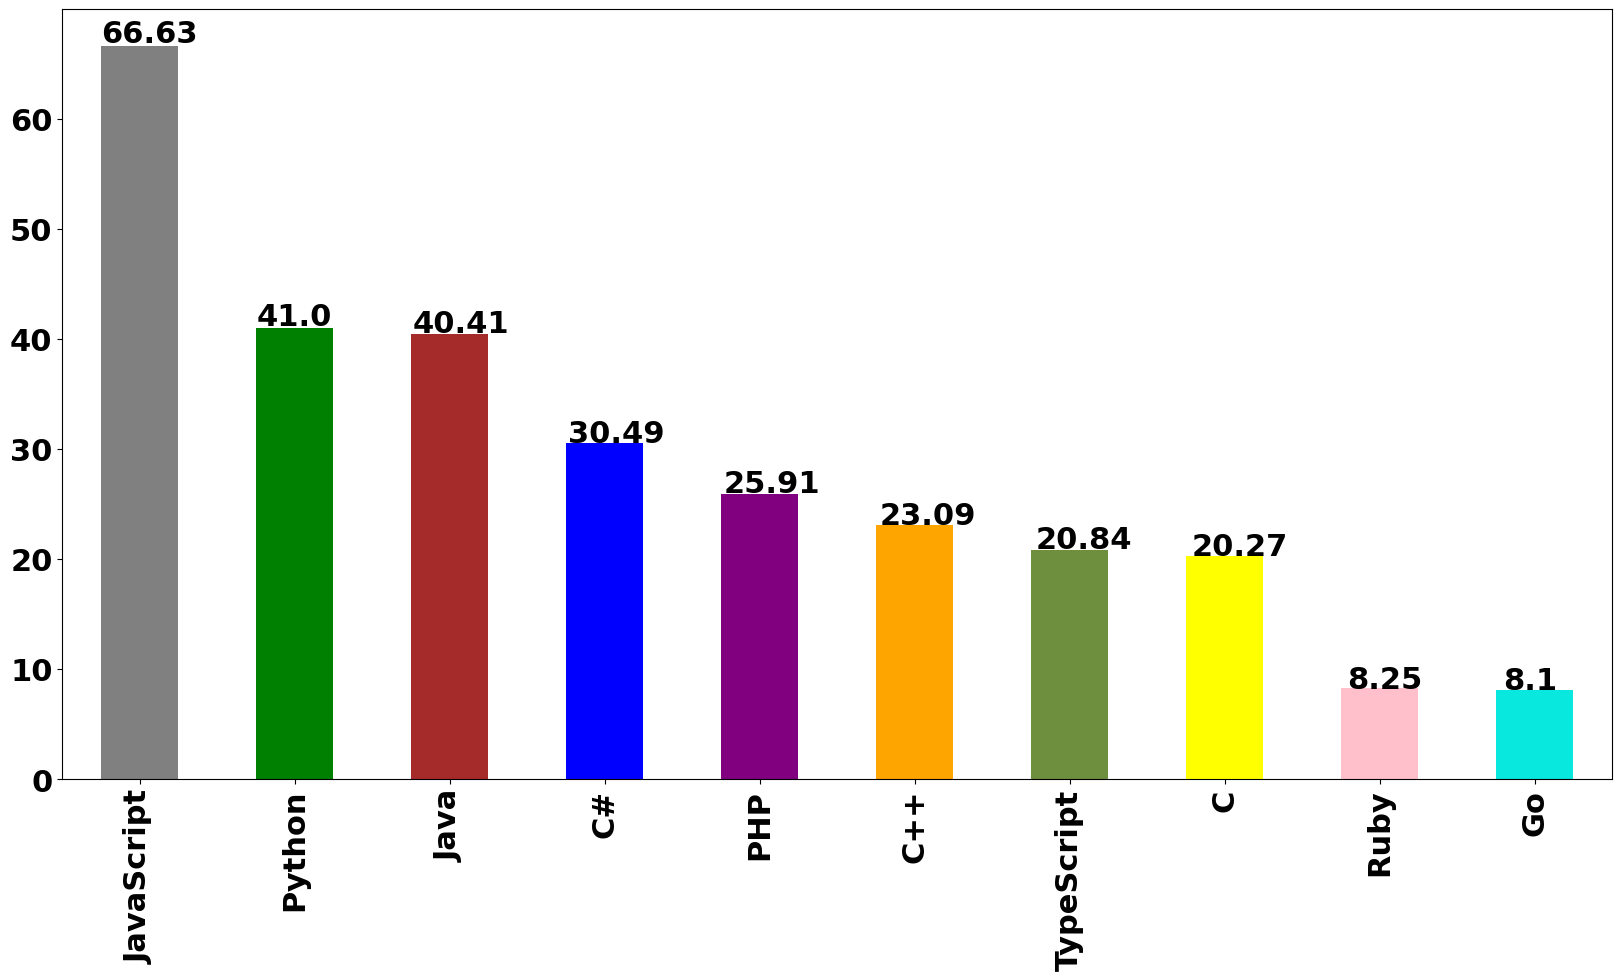

In [332]:
# plotting data
ax_19 = s_2019_proficiencies_percentages['top ten proficiency percentages'].plot.bar(color=languages_palette_list)
# annotating values on top of each bar, for readability
for p in ax_19.patches:
    ax_19.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))

Top 5 languages in 2019: <br>
1. JavaScript
2. Python
3. Java
4. C# 
5. PHP <br>

This year, a couple of noticeable things happened:<br/>
**Python** has now surpassed also **Java**, taking 2nd position. **Go**, a language launched by Google in 2009 (so relatively new, for a programming language), just entered the top ten, at the last position.

In [333]:
# saving the plot
fig = ax_19.get_figure()
fig.savefig(os.path.join("..", "plots", 'Q1_2019.png'))  # Save the figure to a file

#### 2020 Results Analysis
Now I'll compute the answer to first question, referring to 2020 data:


In [334]:
# instantiating  a LanguagesStatsExtractor object
lre_20 = LanguagesRankingExtractor(df_surveys_20, columns_selection_criteria="LanguageWorkedWith", prefix_to_remove='LanguageWorkedWith: ')

# computing languages proficiency ranking in 2020
s_2020_proficiencies_stats = lre_20.get_stats()

In [335]:
s_2020_proficiencies_stats['top ten languages']

JavaScript               38822.0
HTML/CSS                 36181.0
SQL                      31413.0
Python                   25287.0
Java                     23074.0
Bash/Shell/PowerShell    18980.0
C#                       18041.0
PHP                      15007.0
TypeScript               14578.0
C++                      13707.0
dtype: float64

As usual, we find SQL in the top ten, togheter with HTML/CSS.

Let's see if we have other "non-language entries" in the full ranking:

In [336]:
s_2020_proficiencies_stats['full ranking']

LanguageWorkedWith: JavaScript               38822.0
LanguageWorkedWith: HTML/CSS                 36181.0
LanguageWorkedWith: SQL                      31413.0
LanguageWorkedWith: Python                   25287.0
LanguageWorkedWith: Java                     23074.0
LanguageWorkedWith: Bash/Shell/PowerShell    18980.0
LanguageWorkedWith: C#                       18041.0
LanguageWorkedWith: PHP                      15007.0
LanguageWorkedWith: TypeScript               14578.0
LanguageWorkedWith: C++                      13707.0
LanguageWorkedWith: C                        12487.0
LanguageWorkedWith: Go                        5038.0
LanguageWorkedWith: Kotlin                    4468.0
LanguageWorkedWith: Ruby                      4046.0
LanguageWorkedWith: Assembly                  3553.0
LanguageWorkedWith: VBA                       3499.0
LanguageWorkedWith: Swift                     3397.0
LanguageWorkedWith: R                         3288.0
LanguageWorkedWith: Rust                      

In [337]:
lre_20 = LanguagesRankingExtractor(df_surveys_20, columns_selection_criteria="LanguageWorkedWith", prefix_to_remove='LanguageWorkedWith: ', exclusion_list=['LanguageWorkedWith: HTML/CSS', 'LanguageWorkedWith: SQL', 'LanguageWorkedWith: Bash/Shell/Powershell'])

s_2020_proficiencies_stats = lre_20.get_stats()

In [338]:
s_2020_proficiencies_stats['top ten languages']

JavaScript    38822.0
Python        25287.0
Java          23074.0
C#            18041.0
PHP           15007.0
TypeScript    14578.0
C++           13707.0
C             12487.0
Go             5038.0
Kotlin         4468.0
dtype: float64

In [339]:
# computing percentages
lpp_20 = LanguagesProficienciesPercentages(lre_20)

s_2020_proficiencies_percentages = lpp_20.get_stats()

In [340]:
s_2020_proficiencies_percentages['proficiency percentages']

LanguageWorkedWith: JavaScript     60.225563
LanguageWorkedWith: Python         39.228371
LanguageWorkedWith: Java           35.795287
LanguageWorkedWith: C#             27.987465
LanguageWorkedWith: PHP            23.280743
LanguageWorkedWith: TypeScript     22.615225
LanguageWorkedWith: C++            21.264020
LanguageWorkedWith: C              19.371403
LanguageWorkedWith: Go              7.815578
LanguageWorkedWith: Kotlin          6.931323
LanguageWorkedWith: Ruby            6.276663
LanguageWorkedWith: Assembly        5.511860
LanguageWorkedWith: VBA             5.428088
LanguageWorkedWith: Swift           5.269853
LanguageWorkedWith: R               5.100759
LanguageWorkedWith: Rust            4.543833
LanguageWorkedWith: Objective-C     3.630102
LanguageWorkedWith: Dart            3.537022
LanguageWorkedWith: Scala           3.183320
LanguageWorkedWith: Perl            2.786181
LanguageWorkedWith: Haskell         1.895720
LanguageWorkedWith: Julia           0.805138
dtype: flo

### Histogram of most popular languages in 2020

In [341]:
# Blackify Kotlin!
languages_palette['Kotlin'] = "#000000"

In [342]:
languages_palette_list = map_languages_to_color_list(languages_palette, s_2020_proficiencies_percentages['top ten proficiency percentages'])

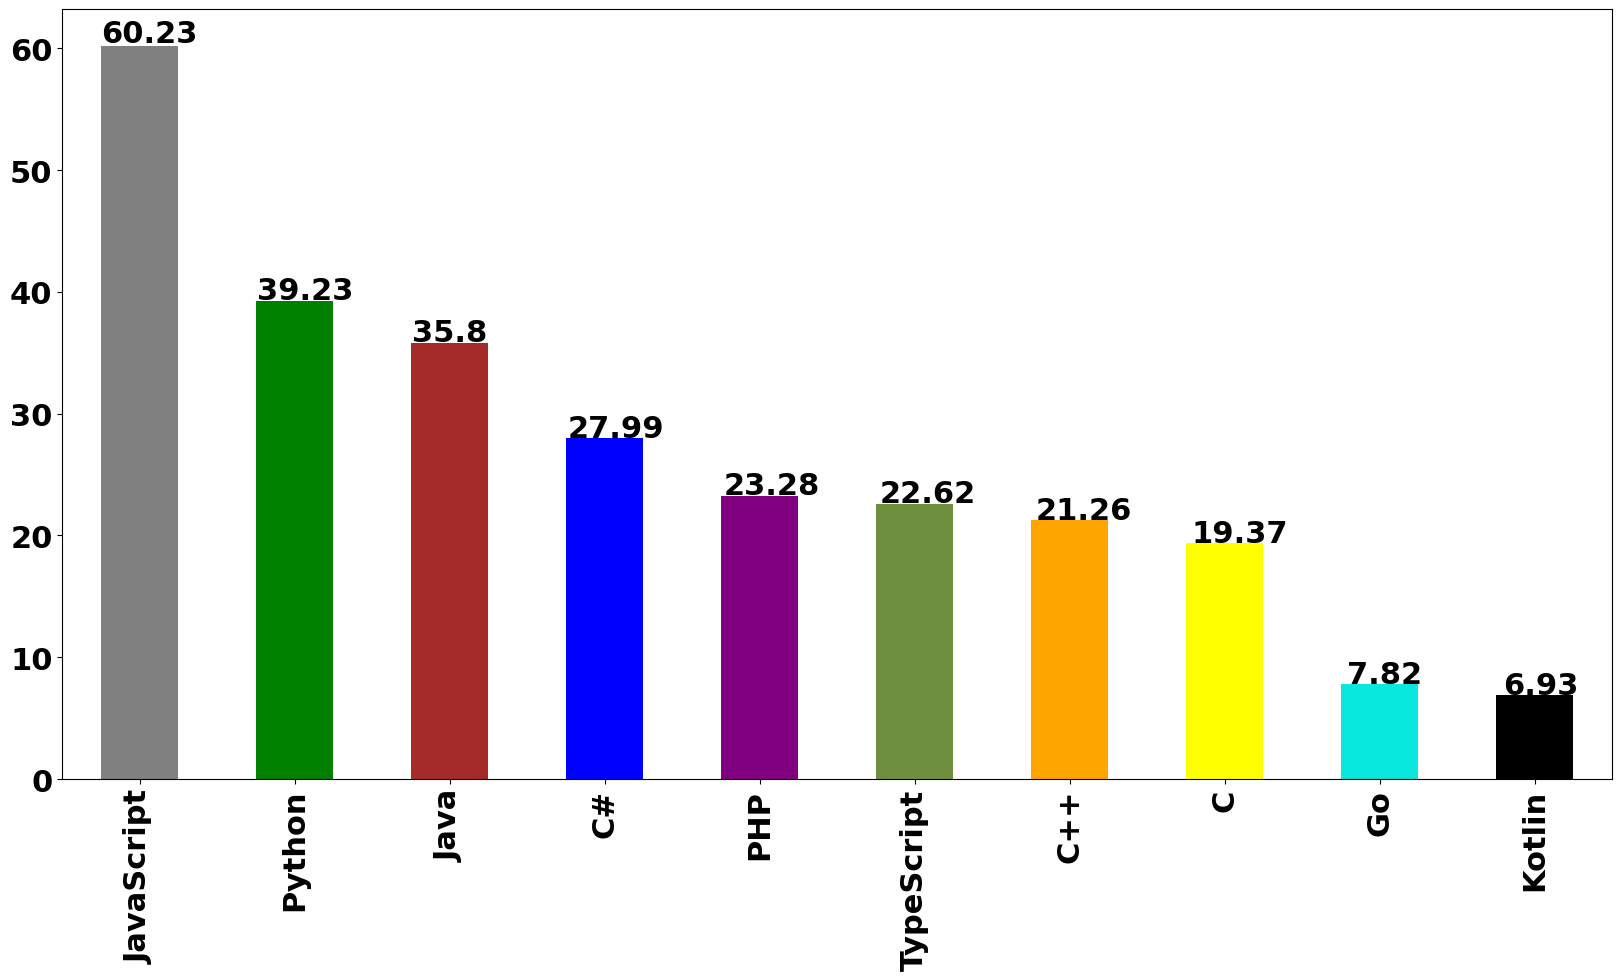

In [343]:
# plotting data
ax_20 = s_2020_proficiencies_percentages['top ten proficiency percentages'].plot.bar(color=languages_palette_list)
# annotating values on top of each bar, for readability
for p in ax_20.patches:
    ax_20.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))

Top 5 languages in 2020: <br>
1. JavaScript
2. Python
3. Java
4. C# 
5. PHP <br>

This year, no big changes in top five positions can be noticed.

Two newcomers can be spotted at the last top-ten position:
1. **Go**. This language has been around for a decade, but it now starts to get a good amount of popularity. Not sure what is the reason behind the fact that it has finally got a spot in the top 10.
2. **Kotlin**. This presence in the top ten is very interesting. The language is not really "brand new", since it is out since 2011, but it has probably gained popularity at the expense of the main language for Android development: Java. Obviously, this is just a feeling, but it is quite probable that people approaching Android app development tend to learn Kotlin more than before, hence, most probably, some of them never really learned Java itself (the main language for Android developers for years). A little deeper in this regard, could come comparing how many of those that have declared to have been working in Kotlin has also declared to have been working in Java at some point in time.b

In [344]:
# saving the plot
fig = ax_20.get_figure()
fig.savefig(os.path.join("..", "plots", 'Q1_2020.png'))  # Save the figure to a file

#### 2021 Results Analysis
Now I'll compute the answer to first question, referring to 2021 data:


In [345]:
# instantiating  a LanguagesStatsExtractor object
lre_21 = LanguagesRankingExtractor(df_surveys_21, columns_selection_criteria="LanguageHaveWorkedWith", prefix_to_remove='LanguageHaveWorkedWith: ')

# computing languages proficiency ranking in 2021
s_2021_proficiencies_stats = lre_21.get_stats()

In [346]:
s_2021_proficiencies_stats['top ten languages']

JavaScript    53587.0
HTML/CSS      46259.0
Python        39792.0
SQL           38835.0
Java          29162.0
Node.js       27975.0
TypeScript    24909.0
C#            22984.0
Bash/Shell    22385.0
C++           20057.0
dtype: float64

Let's see if we have other "non-programmin-languages entries" in the full ranking and delete them:

In [347]:
s_2021_proficiencies_stats['full ranking']

LanguageHaveWorkedWith: JavaScript     53587.0
LanguageHaveWorkedWith: HTML/CSS       46259.0
LanguageHaveWorkedWith: Python         39792.0
LanguageHaveWorkedWith: SQL            38835.0
LanguageHaveWorkedWith: Java           29162.0
LanguageHaveWorkedWith: Node.js        27975.0
LanguageHaveWorkedWith: TypeScript     24909.0
LanguageHaveWorkedWith: C#             22984.0
LanguageHaveWorkedWith: Bash/Shell     22385.0
LanguageHaveWorkedWith: C++            20057.0
LanguageHaveWorkedWith: PHP            18130.0
LanguageHaveWorkedWith: C              17329.0
LanguageHaveWorkedWith: PowerShell      8871.0
LanguageHaveWorkedWith: Go              7879.0
LanguageHaveWorkedWith: Kotlin          6866.0
LanguageHaveWorkedWith: Rust            5799.0
LanguageHaveWorkedWith: Ruby            5569.0
LanguageHaveWorkedWith: Dart            4965.0
LanguageHaveWorkedWith: Assembly        4632.0
LanguageHaveWorkedWith: Swift           4204.0
LanguageHaveWorkedWith: R               4185.0
LanguageHaveW

**Node.js** is not a language itself, but a JavaScript framework. **TypeScript** instead, is somthing like a superset of JavaScript and then deserves an entry in the statistics. 

In [348]:
lre_21 = LanguagesRankingExtractor(df_surveys_21, columns_selection_criteria="LanguageHaveWorkedWith", prefix_to_remove='LanguageHaveWorkedWith: ',\
    exclusion_list=['LanguageHaveWorkedWith: HTML/CSS', 'LanguageHaveWorkedWith: SQL', 'LanguageHaveWorkedWith: Bash/Shell', 'LanguageHaveWorkedWith: PowerShell'],\
        entries_merge_list=[('JavaScript', 'Node.js')])

s_2021_proficiencies_stats = lre_21.get_stats()

In [349]:
s_2021_proficiencies_stats['top ten languages']

JavaScript    55300.0
Python        39792.0
Java          29162.0
TypeScript    24909.0
C#            22984.0
C++           20057.0
PHP           18130.0
C             17329.0
Go             7879.0
Kotlin         6866.0
dtype: float64

Now that we have programming languages only, we can analyze related proficiency percentages:

In [350]:
# computing percentages
lpp_21 = LanguagesProficienciesPercentages(lre_21)

s_2021_proficiencies_percentages = lpp_21.get_stats()

In [351]:
s_2021_proficiencies_percentages['top ten proficiency percentages']

JavaScript    66.275962
Python        47.689929
Java          34.950083
TypeScript    29.852946
C#            27.545872
C++           24.037920
PHP           21.728448
C             20.768466
Go             9.442826
Kotlin         8.228766
dtype: float64

### Histogram of most popular languages in 2021

In [352]:
languages_palette_list = map_languages_to_color_list(languages_palette, s_2021_proficiencies_percentages['top ten proficiency percentages'])

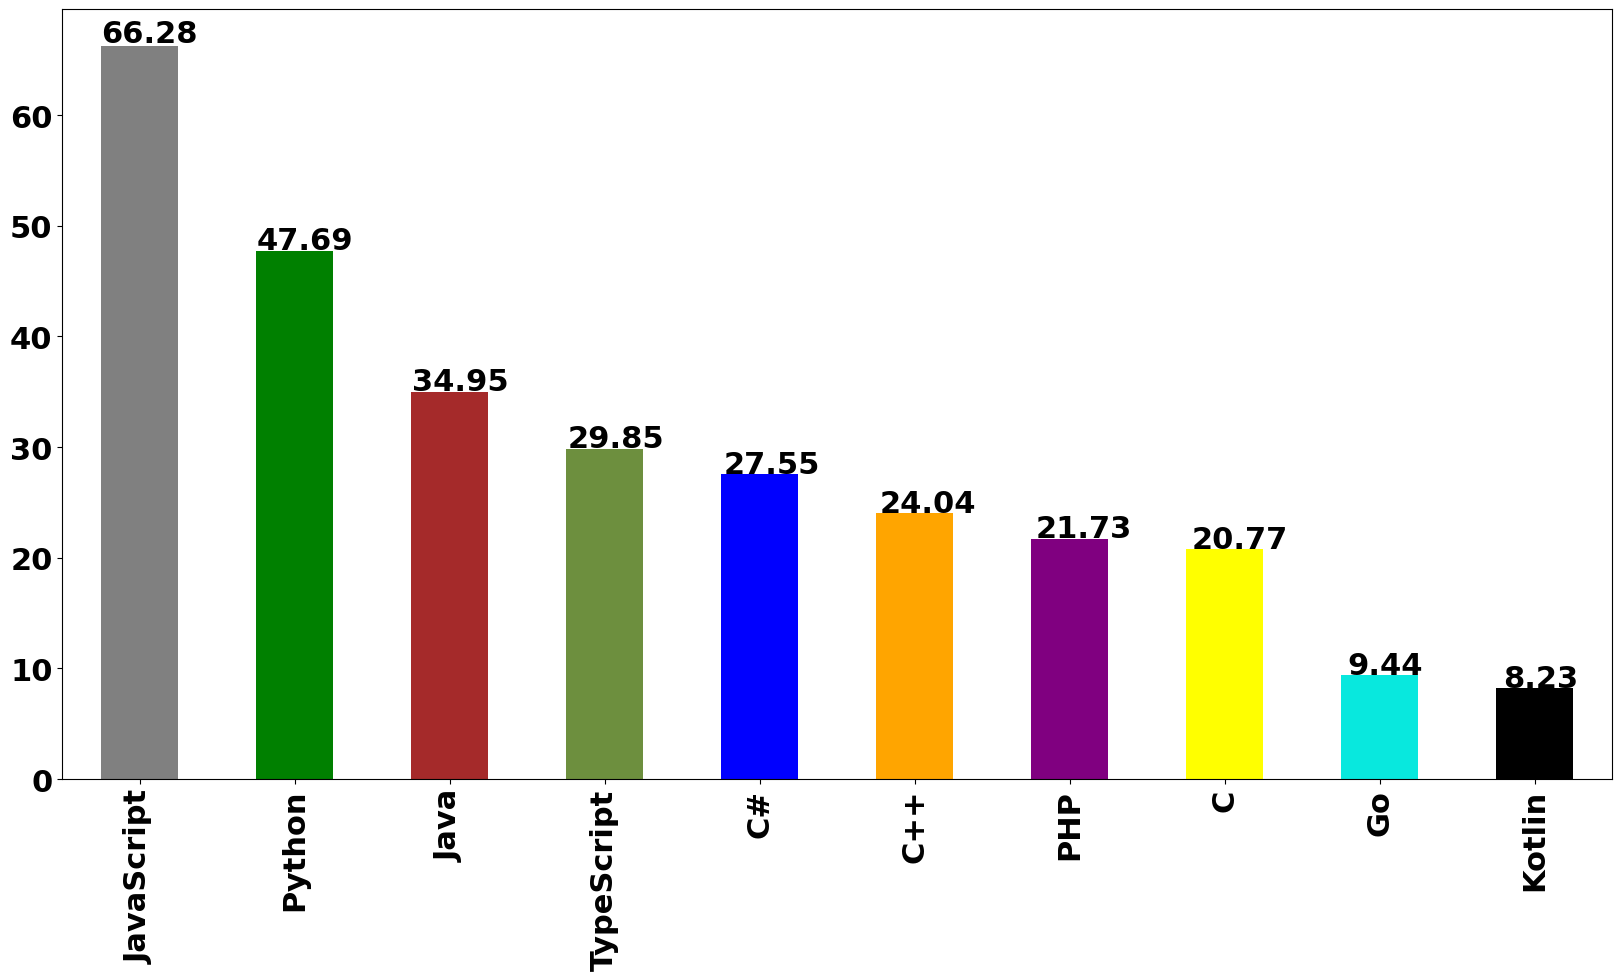

In [353]:
# plotting data
ax_21 = s_2021_proficiencies_percentages['top ten proficiency percentages'].plot.bar(color=languages_palette_list)
# annotating values on top of each bar, for readability
for p in ax_21.patches:
    ax_21.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))

Top 5 languages in 2021: <br>
1. JavaScript
2. Python
3. Java
4. TypeScript
5. C# <br>

In 2021, we can see top five are stable. From the 6th to the 10th positions, we should notice how **C++** has surpassed **PHP**. Probably denoting how PHP is been replaced by other web technologies at the time, with C++ keeping its historical and die-hard market share.

In [354]:
# saving the plot
fig = ax_21.get_figure()
fig.savefig(os.path.join("..", "plots", 'Q1_2021.png'))  # Save the figure to a file

### 2022 Results Analysis
Now I'll compute the answer to first question, referring to 2022 data:


In [355]:
# instantiating  a LanguagesStatsExtractor object
lre_22 = LanguagesRankingExtractor(df_surveys_22, columns_selection_criteria="LanguageHaveWorkedWith", prefix_to_remove='LanguageHaveWorkedWith: ')

# computing languages proficiency ranking in 2021
s_2022_proficiencies_stats = lre_22.get_stats()

In [356]:
s_2022_proficiencies_stats['top ten languages']

JavaScript    46443.0
HTML/CSS      39142.0
SQL           35127.0
Python        34155.0
TypeScript    24752.0
Java          23644.0
Bash/Shell    20656.0
C#            19883.0
C++           16024.0
PHP           14827.0
dtype: float64

Let's see if we have other "non-language entries" in the full ranking and delete them:

In [357]:
s_2022_proficiencies_stats['full ranking']

LanguageHaveWorkedWith: JavaScript     46443.0
LanguageHaveWorkedWith: HTML/CSS       39142.0
LanguageHaveWorkedWith: SQL            35127.0
LanguageHaveWorkedWith: Python         34155.0
LanguageHaveWorkedWith: TypeScript     24752.0
LanguageHaveWorkedWith: Java           23644.0
LanguageHaveWorkedWith: Bash/Shell     20656.0
LanguageHaveWorkedWith: C#             19883.0
LanguageHaveWorkedWith: C++            16024.0
LanguageHaveWorkedWith: PHP            14827.0
LanguageHaveWorkedWith: C              13692.0
LanguageHaveWorkedWith: PowerShell      8575.0
LanguageHaveWorkedWith: Go              7922.0
LanguageHaveWorkedWith: Rust            6625.0
LanguageHaveWorkedWith: Kotlin          6507.0
LanguageHaveWorkedWith: Dart            4648.0
LanguageHaveWorkedWith: Ruby            4299.0
LanguageHaveWorkedWith: Assembly        3887.0
LanguageHaveWorkedWith: Swift           3489.0
LanguageHaveWorkedWith: R               3308.0
LanguageHaveWorkedWith: VBA             3185.0
LanguageHaveW

In [358]:
'LanguageHaveWorkedWith: SQL' in s_2022_proficiencies_stats['full ranking'].index

True

In [359]:
'LanguageHaveWorkedWith: Angular' in s_2022_proficiencies_stats['full ranking'].index

False

In [360]:
'LanguageHaveWorkedWith: Node.js' in s_2022_proficiencies_stats['full ranking'].index

False

Node.js and Angular have disappeared from the list of languages, so there is no need to merge those entries with JavaScript anymore

In [361]:
lre_22 = LanguagesRankingExtractor(df_surveys_22, columns_selection_criteria="LanguageHaveWorkedWith", prefix_to_remove='LanguageHaveWorkedWith: ',\
    exclusion_list=['LanguageHaveWorkedWith: HTML/CSS', 'LanguageHaveWorkedWith: SQL', 'LanguageHaveWorkedWith: Bash/Shell', 'LanguageHaveWorkedWith: PowerShell'])

s_2022_proficiencies_stats = lre_22.get_stats()

Now that we have programming languages only, we can analyze related proficiency percentages:

In [362]:
# computing percentages
lpp_22 = LanguagesProficienciesPercentages(lre_22)

s_2022_proficiencies_percentages = lpp_22.get_stats()

In [363]:
s_2022_proficiencies_percentages['top ten proficiency percentages']

JavaScript    63.387836
Python        46.616531
TypeScript    33.782825
Java          32.270568
C#            27.137359
C++           21.870394
PHP           20.236665
C             18.687558
Go            10.812360
Rust           9.042147
dtype: float64

I will unify **Bash/Shell** with **PowerShell** in the already seen entry **Bash/Shell/PowerShell** for the sake of homegeneous comparison.

### Histogram of most popular languages in 2022

In [364]:
# Rustify rust!
languages_palette['Rust'] = "#b7410e"

In [365]:
languages_palette_list = map_languages_to_color_list(languages_palette, s_2022_proficiencies_percentages['top ten proficiency percentages'])

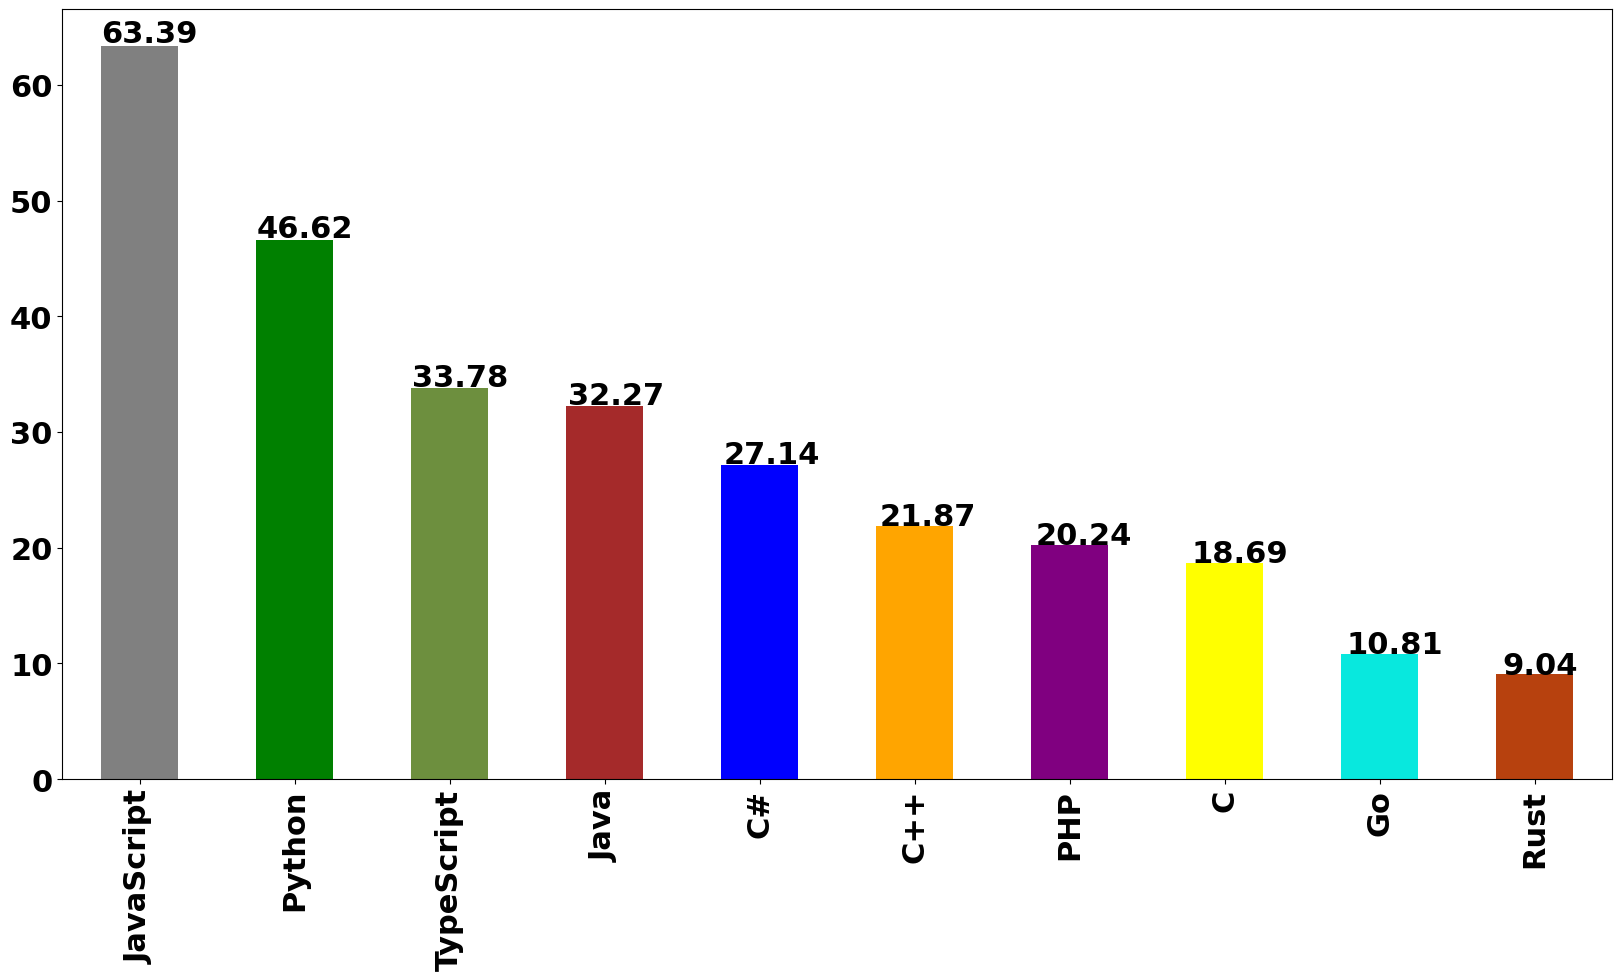

In [366]:
# plotting data
ax_22 = s_2022_proficiencies_percentages['top ten proficiency percentages'].plot.bar(color=languages_palette_list)
# annotating values on top of each bar, for readability
for p in ax_22.patches:
    ax_22.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))

Top 5 languages in 2022: <br>
1. JavaScript
2. Python
4. TypeScript
5. Java
6. C# <br>

Stable positions also in 2022. Interesting things may be happening with Java and Kotlin again, since Kotlin disappeared from top ten, while Java keep decreasing its overall share. 
*Rust* have come into the scene. Very interesting language there. Worth to check if its increase is possibly at the expenses of C++.

In [367]:
# saving the plot
fig = ax_22.get_figure()
fig.savefig(os.path.join("..", "plots", 'Q1_2022.png'))  # Save the figure to a file

Now I'll proceed with trend analysis, in the following notebook.<br/>
To do so, once again, I'll need to store data from the current notebook.


In [368]:
%store s_2011_proficiencies_stats
%store s_2011_proficiencies_percentages
%store s_2012_proficiencies_stats
%store s_2012_proficiencies_percentages
%store s_2013_proficiencies_stats
%store s_2013_proficiencies_percentages
%store s_2014_proficiencies_stats
%store s_2014_proficiencies_percentages
%store s_2015_proficiencies_stats
%store s_2015_proficiencies_percentages
%store s_2016_proficiencies_stats
%store s_2016_proficiencies_percentages
%store s_2017_proficiencies_stats
%store s_2017_proficiencies_percentages
%store s_2018_proficiencies_stats
%store s_2018_proficiencies_percentages
%store s_2019_proficiencies_stats
%store s_2019_proficiencies_percentages
%store s_2020_proficiencies_stats
%store s_2020_proficiencies_percentages
%store s_2021_proficiencies_stats
%store s_2021_proficiencies_percentages
%store s_2022_proficiencies_stats
%store s_2022_proficiencies_percentages

Stored 's_2011_proficiencies_stats' (dict)
Stored 's_2011_proficiencies_percentages' (dict)
Stored 's_2012_proficiencies_stats' (dict)
Stored 's_2012_proficiencies_percentages' (dict)
Stored 's_2013_proficiencies_stats' (dict)
Stored 's_2013_proficiencies_percentages' (dict)
Stored 's_2014_proficiencies_stats' (dict)
Stored 's_2014_proficiencies_percentages' (dict)
Stored 's_2015_proficiencies_stats' (dict)
Stored 's_2015_proficiencies_percentages' (dict)
Stored 's_2016_proficiencies_stats' (dict)
Stored 's_2016_proficiencies_percentages' (dict)
Stored 's_2017_proficiencies_stats' (dict)
Stored 's_2017_proficiencies_percentages' (dict)
Stored 's_2018_proficiencies_stats' (dict)
Stored 's_2018_proficiencies_percentages' (dict)
Stored 's_2019_proficiencies_stats' (dict)
Stored 's_2019_proficiencies_percentages' (dict)
Stored 's_2020_proficiencies_stats' (dict)
Stored 's_2020_proficiencies_percentages' (dict)
Stored 's_2021_proficiencies_stats' (dict)
Stored 's_2021_proficiencies_percenta

In [369]:
sys.path.append(os.path.join("..", "preparation"))

In [370]:
SERIALIZED_DATA_FOLDER = os.path.join("..", "data", "serialized")

In [371]:
joblib.dump(lpp_18, os.path.join(SERIALIZED_DATA_FOLDER, "lpp_18.joblib"))
joblib.dump(lpp_19, os.path.join(SERIALIZED_DATA_FOLDER, "lpp_19.joblib"))
joblib.dump(lpp_20, os.path.join(SERIALIZED_DATA_FOLDER, "lpp_20.joblib"))

['..\\data\\serialized\\lpp_20.joblib']

In [372]:
%store df_surveys_18
%store df_surveys_19
%store df_surveys_20
%store df_surveys_21
%store df_surveys_22
%store SERIALIZED_DATA_FOLDER


Stored 'df_surveys_18' (DataFrame)
Stored 'df_surveys_19' (DataFrame)
Stored 'df_surveys_20' (DataFrame)
Stored 'df_surveys_21' (DataFrame)
Stored 'df_surveys_22' (DataFrame)
Stored 'SERIALIZED_DATA_FOLDER' (str)


# Android Platform in-depth analysis

# Question N°2
This notebook purpose is to answer the Third Question: </br>
<b><i>"Referring specifically to Android paltform, are there any visible shifts in languages popularity between two or more of the top ten languages over the years?"</i></b>
Focus will be on Java vs Kotlin.

### In depth analysis of Java vs Kotlin

I will extract some more targeted statistics, to get a better idea, of the relationship between the two apparently conflicting trends between thest two languages, wich shares such an interesting (for developers and for software related industries) field of application as Android development.

In [373]:
import os
import sys
import pandas as pd
import joblib
import matplotlib.pyplot as plt

In [374]:
%store -r df_surveys_18

In [375]:

%store -r df_surveys_19
%store -r df_surveys_20
%store -r df_surveys_21
%store -r df_surveys_22
%store -r SERIALIZED_DATA_FOLDER

lpp_18 = joblib.load(os.path.join(SERIALIZED_DATA_FOLDER, "lpp_18.joblib"))
%store -r lpp_19
%store -r lpp_20

In [376]:
cols_18 = df_surveys_18.columns[df_surveys_18.isin(["Android"]).any()]
cols_19 = df_surveys_19.columns[df_surveys_19.isin(["Android"]).any()]
cols_20 = df_surveys_20.columns[df_surveys_20.isin(["Android"]).any()]
#df_surveys_18[df_surveys_18.eq("Android").any(1)]

In [377]:
cols_18

Index(['PlatformWorkedWith', 'PlatformDesireNextYear'], dtype='object')

In [378]:
cols_19

Index(['PlatformWorkedWith', 'PlatformDesireNextYear'], dtype='object')

In [379]:
cols_20

Index(['PlatformDesireNextYear', 'PlatformWorkedWith'], dtype='object')

We have a clear indication on where to find the information about the platform of reference.

Then, we first define as base to count shares as:
$$ SharedBase := \frac{|(Java \cup Kotlin) \cap Android|}{|Android|}

As the percentage of respondents that have Java or Kotlin experience, and that have declared to have worked on Android platform.

Then, we can define joint intersection of Java and Kotlin on Android platform:

$$ UsingBoth := \frac{|Java \cap Kotlin \cap Android|}{|SharedBase|}

From that, we can also define:

$$ JavaLoyals = \frac{|Java \cap Android| \setminus |Kotlin \cap Android|}{|SharedBase|}

as the percentage of developers in the shared base that used Java but not Kotlin.

As opposed to:

$$ KotlinLoyals = \frac{|Kotlin \cap Android| \setminus |Java \cap Android|}{|SharedBase|}

as the percentage of developers in share base that used Kotlin but not Java.

For practical reason, I will call these value as follows:

In [380]:
java_vs_kotlin_experience = ["Java plus Kotlin Android developers", "Android Developers that use Java and Kotlin together", "Java exclusive share on Android Developers", "Kotlin exclusive share on Android Developers"]

First we will compute:
$$ |SharedBase| = \frac{|(Java \cup Kotlin) \cap Android|}{|Android|}

In [381]:
base_share_18 = lpp_18.joint_share(["LanguageWorkedWith: Java", "LanguageWorkedWith: Kotlin"], platform="Android")
base_share_19 = lpp_19.joint_share(["LanguageWorkedWith: Java", "LanguageWorkedWith: Kotlin"], platform="Android")
base_share_20 = lpp_20.joint_share(["LanguageWorkedWith: Java", "LanguageWorkedWith: Kotlin"], platform="Android")

In [382]:
base_share_18

83.07228915662651

In [383]:
base_share_19

85.05864354920959

In [384]:
base_share_20

81.3488759367194

We can now compute:

$$ \frac{|Java \cap Kotlin \cap Android|}{|SharedBase|}

In [385]:
android_java_and_kotlin_shares_intersections_18 = lpp_18.joint_share(["LanguageWorkedWith: Java", "LanguageWorkedWith: Kotlin"], unison=True, platform="Android")
android_java_and_kotlin_shares_intersections_19 = lpp_19.joint_share(["LanguageWorkedWith: Java", "LanguageWorkedWith: Kotlin"], unison=True, platform="Android")
android_java_and_kotlin_shares_intersections_20 = lpp_20.joint_share(["LanguageWorkedWith: Java", "LanguageWorkedWith: Kotlin"], unison=True, platform="Android")

In [386]:
android_java_and_kotlin_shares_intersections_18

13.433734939759038

In [387]:
android_java_and_kotlin_shares_intersections_19

31.310555838857724

In [388]:
android_java_and_kotlin_shares_intersections_20

31.973355537052456

Than we will compute:
$$ \frac{|Java \cap Android| \setminus |Kotlin \cap Android|}{|SharedBase|}

In [389]:
android_java_exclusive_share_18 = lpp_18.exclusive_share(ref_language="LanguageWorkedWith: Java", excluded_languages=["LanguageWorkedWith: Kotlin"], platform="Android")
android_java_exclusive_share_19 = lpp_19.exclusive_share(ref_language="LanguageWorkedWith: Java", excluded_languages=["LanguageWorkedWith: Kotlin"], platform="Android")
android_java_exclusive_share_20 = lpp_20.exclusive_share(ref_language="LanguageWorkedWith: Java", excluded_languages=["LanguageWorkedWith: Kotlin"], platform="Android")

In [390]:
android_java_exclusive_share_18

68.97590361445783

In [391]:
android_java_exclusive_share_19

51.45334013258541

In [392]:
android_java_exclusive_share_20

42.714404662781014

In [393]:
android_kotlin_exclusive_share_18 = lpp_18.exclusive_share(ref_language="LanguageWorkedWith: Kotlin", excluded_languages=["LanguageWorkedWith: Java"], platform="Android")
android_kotlin_exclusive_share_19 = lpp_19.exclusive_share(ref_language="LanguageWorkedWith: Kotlin", excluded_languages=["LanguageWorkedWith: Java"], platform="Android")
android_kotlin_exclusive_share_20 = lpp_20.exclusive_share(ref_language="LanguageWorkedWith: Kotlin", excluded_languages=["LanguageWorkedWith: Java"], platform="Android")

In [394]:
android_kotlin_exclusive_share_18

0.6626506024096386

In [395]:
android_kotlin_exclusive_share_19

2.2947475777664454

In [396]:
android_kotlin_exclusive_share_20

6.661115736885928

Now we can proceed plotting data:

In [397]:
import numpy as np

In [398]:
# putting everythin in arrays, so we can populate a dataframe
java_plus_kotlin_share = np.array([base_share_18, base_share_19, base_share_20])
android_java_and_kotlin_shares_intersections = np.array([android_java_and_kotlin_shares_intersections_18, android_java_and_kotlin_shares_intersections_19, android_java_and_kotlin_shares_intersections_20])
java_exclusive_shares = np.array([android_java_exclusive_share_18, android_java_exclusive_share_19, android_java_exclusive_share_20])
kotlin_exclusive_shares = np.array([android_kotlin_exclusive_share_18, android_kotlin_exclusive_share_19, android_kotlin_exclusive_share_20])


In [399]:
java_vs_kotlin_stats =  np.array([java_exclusive_shares, kotlin_exclusive_shares, android_java_and_kotlin_shares_intersections, java_plus_kotlin_share])

In [400]:
# here is the dataframe
df_java_vs_kotlin_18to20_percentages = pd.DataFrame(index=java_vs_kotlin_experience, data=java_vs_kotlin_stats, columns=[2018, 2019, 2020])

In [401]:
#df_java_vs_kotlin_18to20_percentages.index.name = 'year'

In [402]:
df_java_vs_kotlin_18to20_percentages

,2018,2019,2020
Java plus Kotlin Android developers,68.975904,51.453340,42.714405
Android Developers that use Java and Kotlin together,0.662651,2.294748,6.661116
Java exclusive share on Android Developers,13.433735,31.310556,31.973356
Kotlin exclusive share on Android Developers,83.072289,85.058644,81.348876


Now we can also plot the data, but first, it is better to change the legend to make it shorter:

In [403]:
java_vs_kotlin_experience_plot_legend = [r'$JavaLoyals$', r'$KotlinLoyals$', r'$UsingBoth$', r'$SharedBase$']

In [404]:
df_java_vs_kotlin_18to20_percentages_plot = pd.DataFrame(index=java_vs_kotlin_experience_plot_legend, data=java_vs_kotlin_stats, columns=[2018, 2019, 2020])

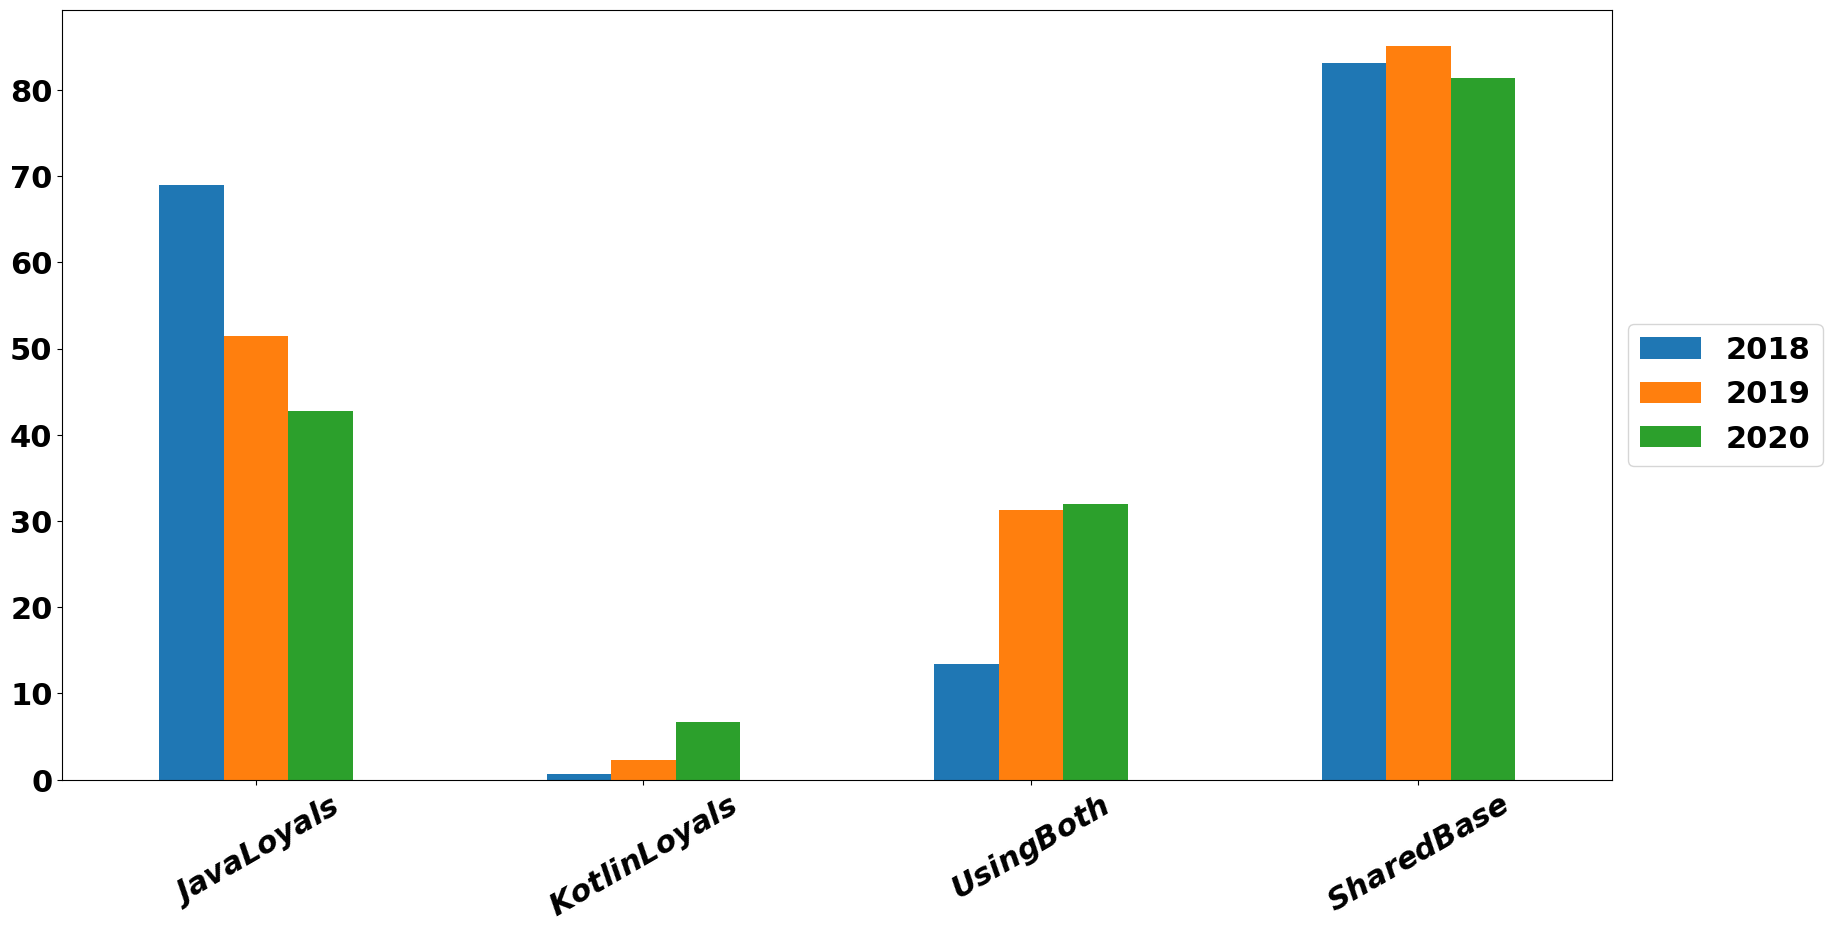

In [405]:
df_java_vs_kotlin_18to20_percentages_plot.plot.bar()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation=30, horizontalalignment="center")
plt.show()

In [406]:
df_java_vs_kotlin_18to20_percentages_no_share_base = df_java_vs_kotlin_18to20_percentages[:-1]

In [407]:
java_vs_kotlin_experience_plot_legend_no_shares = [r'$JavaLoyals$', r'$KotlinLoyals$', r'$UsingBoth$']

In [408]:
java_vs_kotlin_stats_plot_no_shares =  np.array([java_exclusive_shares, kotlin_exclusive_shares, android_java_and_kotlin_shares_intersections])

In [409]:
df_java_vs_kotlin_18to20_percentages_plot_no_shares = pd.DataFrame(index=java_vs_kotlin_experience_plot_legend_no_shares, data=java_vs_kotlin_stats_plot_no_shares, columns=[2018, 2019, 2020])

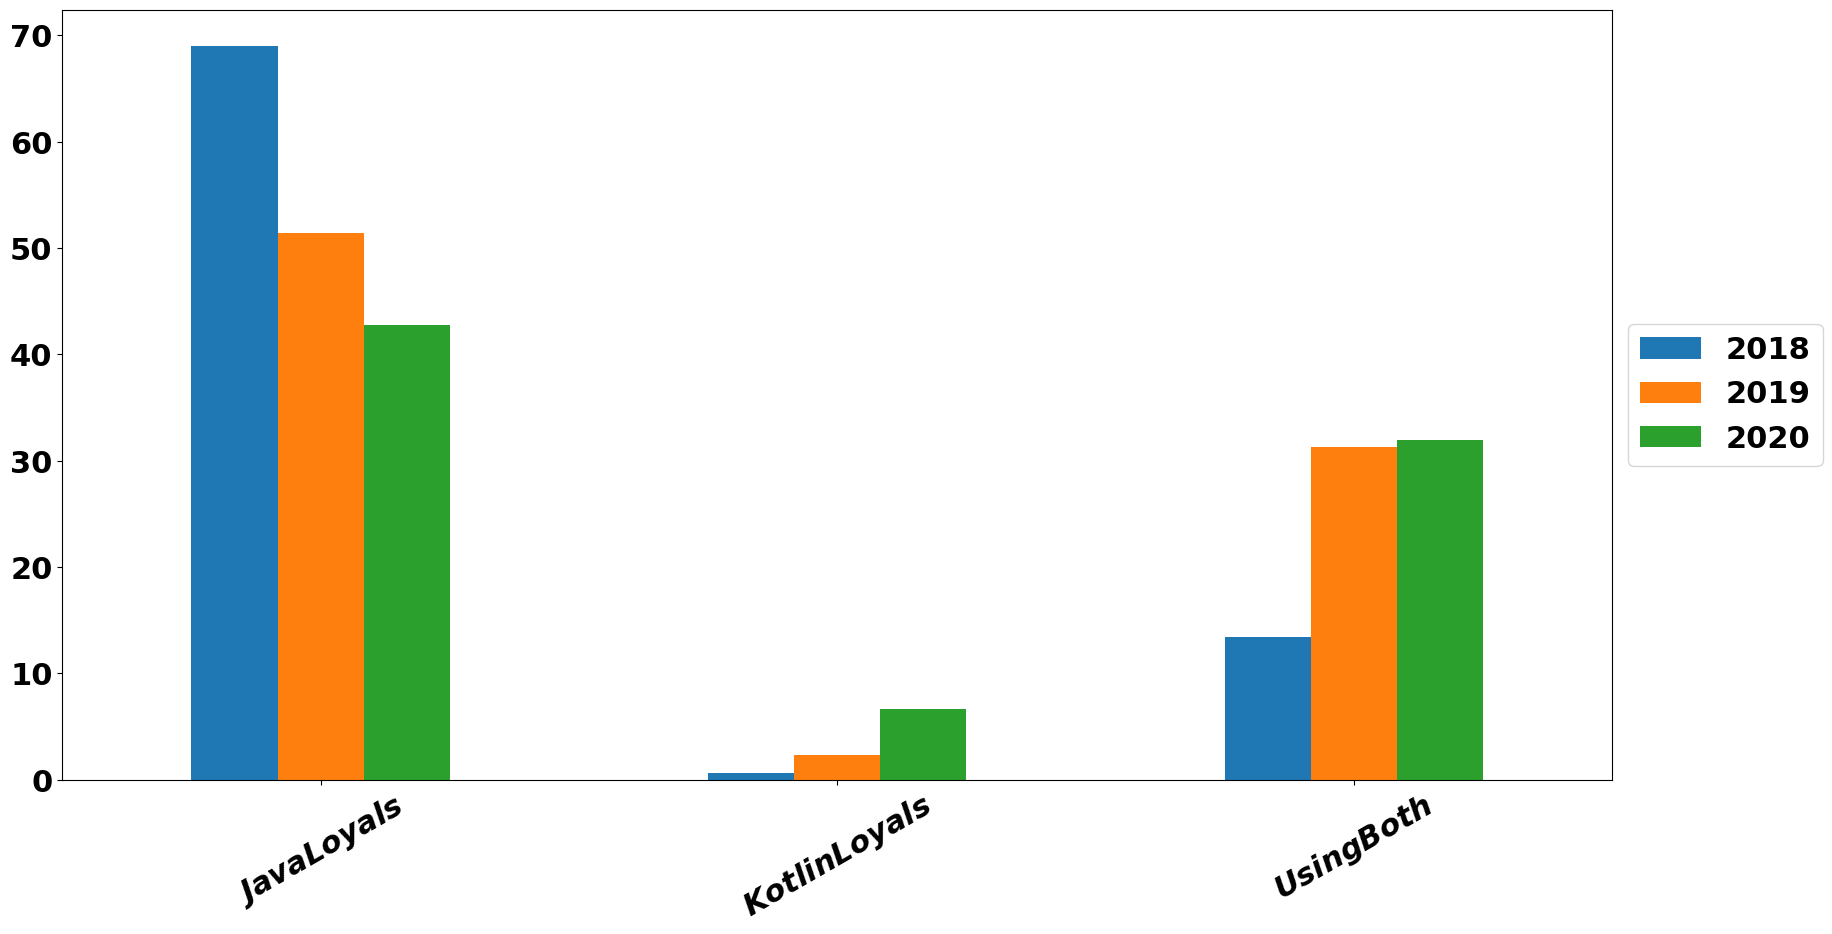

In [410]:
df_java_vs_kotlin_18to20_percentages_plot_no_shares.plot.bar()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation=30, horizontalalignment="center")
plt.show()

It can be clearly spotted an increase in Kotlin developers in Android base, simultaneously with a decrease in Java developer in the same base.

As a conclusion, we can say that is likely that a significative percentage of respondents were drawn from Java to Kotlin development. But this doesn't seem to fully explain the leak of Java developers, both on Android and on other platforms.  